# Datathon FME 2024

In [7]:
import numpy
import pandas
import rich

import json
import pathlib
import uuid
from dataclasses import dataclass
from typing import Dict, List, Literal


@dataclass
class Participant:
    id: uuid.UUID  # Unique identifier

    # Personal data
    name: str
    email: str
    age: int
    year_of_study: Literal["1st year", "2nd year", "3rd year", "4th year", "Masters", "PhD"]
    shirt_size: Literal["S", "M", "L", "XL"]
    university: str
    dietary_restrictions: Literal["None", "Vegetarian", "Vegan", "Gluten-free", "Other"]

    # Experience and programming skills
    programming_skills: Dict[str, int]
    experience_level: Literal["Beginner", "Intermediate", "Advanced"]
    hackathons_done: int

    # Interests, preferences and constraints
    interests: List[str]
    preferred_role: Literal[
        "Analysis", "Visualization", "Development", "Design", "Don't know", "Don't care"
    ]
    objective: str
    interest_in_challenges: List[str]
    preferred_languages: List[str]
    friend_registration: List[uuid.UUID]
    preferred_team_size: int
    availability: Dict[str, bool]

    # Description of the participant
    introduction: str
    technical_project: str
    future_excitement: str
    fun_fact: str


def load_participants(path: str) -> List[Participant]:
    if not pathlib.Path(path).exists():
        raise FileNotFoundError(
            f"The file {path} does not exist, are you sure you're using the correct path?"
        )
    if not pathlib.Path(path).suffix == ".json":
        raise ValueError(
            f"The file {path} is not a JSON file, are you sure you're using the correct file?"
        )

    return [Participant(**participant) for participant in json.load(open(path))]

In [8]:

from rich import print

data_path = "datathon_participants.json"
participants = load_participants(data_path)

print(participants[2])

Participant(
    id='ab4b5790-0e6b-43db-bbaa-8670554f0cc8',
    name='Anaïs Giacomo',
    email='anas_giacomo@outlook.com',
    age=21,
    year_of_study='3rd year',
    shirt_size='M',
    university='Universidad de Sevilla',
    dietary_restrictions='None',
    programming_skills={'PostgreSQL': 4, 'TensorFlow': 5, 'Computer Vision': 6, 'Agile Methodology': 3},
    experience_level='Intermediate',
    hackathons_done=2,
    interests=['Lifehacks', 'Health', 'Cybersecurity', 'Communication', 'Music/Art', 'DevOps'],
    preferred_role='Analysis',
    objective="Hey! I'm Anaïs, and I'm all about growth and learning. For this datathon, I'm aiming to dive deep 
into new programming languages and data analytics tools. I'm eager to learn from others, attend workshops and 
mentorship sessions, and absorb as much knowledge as I can. My objective is to improve my skills, expand my 
repertoire, and take away practical experiences that I can apply to my upcoming projects and career. I'm not 
worried about competing; I'm more focused on fostering connections and exchanging ideas to become a better 
developer.",
    interest_in_challenges=['Restb.ai Challenge', 'Mango Challenge', 'AED Challenge'],
    preferred_languages=['English', 'Spanish', 'French', 'German', 'Italian'],
    friend_registration=[],
    preferred_team_size=4,
    availability={
        'Saturday morning': True,
        'Saturday afternoon': True,
        'Saturday night': True,
        'Sunday morning': True,
        'Sunday afternoon': True
    },
    introduction="Hey there! I'm Anaïs, a third-year student with a passion for learning and growth. When I'm not 
busy with coursework, I love diving into new programming languages and data analytics tools. This datathon is all 
about exploring and getting my hands dirty. I'm looking forward to workshops, mentorship sessions, and meeting 
like-minded folks who share my enthusiasm. I'm not a competitive type, but rather someone who craves connection and
knowledge sharing. I'm excited to see where this journey takes me and what new skills I can bring back to my 
projects and career. Let's do this!",
    technical_project="Oh, I just loved working on a project where I used computer vision to build a sign language 
recognition system! As a linguistics minor, I've always been fascinated by languages, and sign language holds a 
special place in my heart. I used TensorFlow to train a model that could detect and recognize hand gestures, and it
was incredibly rewarding to see it in action. I worked with a group of friends, and it was amazing to see how our 
diverse skills and interests came together to create something really cool. We even pitched it to a local 
organization that supports deaf students!",
    future_excitement="I'm genuinely excited to work on developing AI-powered systems that enhance accessibility 
and quality of life for people with disabilities. As someone who's passionate about cybersecurity and health, I 
envision using machine learning to create smart, adaptive technology that predicts and prevents chronic illnesses, 
improving patient outcomes and caregiver efficiency. I'd love to collaborate with cross-functional teams to 
integrate artificial intelligence with biomedical engineering, and work towards empowering individuals with unique 
abilities to take control of their health and wellbeing. It's an ambitious goal, but I'm convinced that the next 
decade will be an era of exponential breakthroughs in healthcare AI.",
    fun_fact="Hey! When I'm not coding, you can catch me singing in my car or belting out show tunes with friends. 
My go-to genre is musical theater, and I can often be found scoping out local productions. Who knew lifehacks and 
musicals would intersect in a 21-year-old coding newbie?"
)

## Project Definition: Initial (Naive Algorithm)

Considering **only the direct mapping attributes** to compute the distance metrics.


- `age`
- `hackathons_done`
- `preferred_team_size`
- `year_of_study`
- `experience_level`


---


- `university`
- `dietary_restrictions`
- `preferred_role`

### Normalization functions

1. Preprocess the attributes to obtain the distance metrics.


In [9]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from rich import print
from typing import List, Dict
from sklearn.preprocessing import MinMaxScaler

# Helper function to normalize values to [0, 1]
def normalize(values, min_val=None, max_val=None):
    values = np.array(values, dtype=float)
    min_val = min_val if min_val is not None else values.min()
    max_val = max_val if max_val is not None else values.max()
    return (values - min_val) / (max_val - min_val)

# Mapping for categorical attributes
YEAR_MAPPING = {
    "1st year": 0.0, "2nd year": 0.2, "3rd year": 0.4,
    "4th year": 0.6, "Masters": 0.8, "PhD": 1.0
}
EXPERIENCE_MAPPING = {"Beginner": 0.0, "Intermediate": 0.5, "Advanced": 1.0}


### Load and Preprocess Participants

In [10]:
import json
import uuid
from dataclasses import dataclass
from typing import Dict, List, Literal

# Define Participant class
@dataclass
class Participant:
    id: uuid.UUID  # Unique identifier

    # Personal data
    name: str
    email: str
    age: int
    year_of_study: Literal["1st year", "2nd year", "3rd year", "4th year", "Masters", "PhD"]
    shirt_size: Literal["S", "M", "L", "XL"]
    university: str
    dietary_restrictions: Literal["None", "Vegetarian", "Vegan", "Gluten-free", "Other"]

    # Experience and programming skills
    programming_skills: Dict[str, int]
    experience_level: Literal["Beginner", "Intermediate", "Advanced"]
    hackathons_done: int

    # Interests, preferences and constraints
    interests: List[str]
    preferred_role: Literal[
        "Analysis", "Visualization", "Development", "Design", "Don't know", "Don't care"
    ]
    objective: str
    interest_in_challenges: List[str]
    preferred_languages: List[str]
    friend_registration: List[uuid.UUID]
    preferred_team_size: int
    availability: Dict[str, bool]

    # Description of the participant
    introduction: str
    technical_project: str
    future_excitement: str
    fun_fact: str

# Load participants data
def load_participants(path: str) -> List[Participant]:
    with open(path, 'r') as file:
        return [Participant(**participant) for participant in json.load(file)]

# Normalize and map participant attributes
def preprocess_participants(participants: List[Participant]) -> List[Participant]:
    for participant in participants:
        # Normalize numerical attributes
        participant.age = normalize([participant.age], min_val=17, max_val=27)[0]
        participant.hackathons_done = normalize([participant.hackathons_done], min_val=0, max_val=9)[0]
        participant.preferred_team_size = normalize([participant.preferred_team_size], min_val=0, max_val=4)[0]

        # Map categorical attributes
        participant.year_of_study = YEAR_MAPPING[participant.year_of_study]
        participant.experience_level = EXPERIENCE_MAPPING[participant.experience_level]

    return participants

# Load and preprocess participants
data_path = "datathon_participants.json"
participants = load_participants(data_path)
participants = preprocess_participants(participants)

print(f"Preprocessed {len(participants)} participants.")


Preprocessed 924 participants.

### Compute Distance

2. Distance computation between two participants after the preprocessing of mapped attributes

In [11]:
# Compute distance between two participants
def compute_distance(p1: Participant, p2: Participant) -> float:
    distance = 0

    # Continuous attributes
    distance += abs(p1.age - p2.age)
    distance += abs(p1.hackathons_done - p2.hackathons_done)
    distance += abs(p1.preferred_team_size - p2.preferred_team_size)
    distance += abs(p1.year_of_study - p2.year_of_study)

    # Categorical attributes
    distance += 0 if p1.university == p2.university else 1
    distance += 0 if p1.dietary_restrictions == p2.dietary_restrictions else 1
    distance += abs(p1.experience_level - p2.experience_level)
    distance += 1 if p1.preferred_role == p2.preferred_role else 0 # If same role more distance, otherwise less distance

    return distance


### Construct Similarity Graph

3. Construction of the complete weighted/distance graph (with distance metric between each pair of node participants)

In [12]:
# Construct a similarity graph
def construct_graph(participants: List[Participant]) -> nx.Graph:
    graph = nx.Graph()
    for i, p1 in enumerate(participants):
        graph.add_node(i, participant=p1)  # Add participant as a node
        for j, p2 in enumerate(participants):
            if i != j:
                distance = compute_distance(p1, p2)
                graph.add_edge(i, j, weight=distance)
    return graph

graph = construct_graph(participants)
print(f"Graph constructed with {len(graph.nodes)} nodes.")


Graph constructed with 924 nodes.

### Greedy Clustering Algorithm

Greedy approach:

- Take an unvisited node `u` of G. Add to the new cluster `C_new`.
- Find the `max_size` closest unvisited nodes to `u`. Those unvisited nodes of G s.t. they are at lowest distance to `u` (the most similars to `u`).
- Add them to `C_new`.
- Mark nodes of `C_new` as visited.

+++ Do this while there are unvisited nodes on G.+++



In [13]:
# Form Clusters based on distances using a Greedy approach
def calculate_distance_matrix(participants: List[Participant]) -> np.ndarray:
    num_participants = len(participants)
    distance_matrix = np.zeros((num_participants, num_participants))

    for i, p1 in enumerate(participants):
        for j, p2 in enumerate(participants):
            if i != j:
                distance_matrix[i, j] = compute_distance(p1, p2)

    return distance_matrix

def form_clusters_with_distances(distance_matrix: np.ndarray, max_size=4) -> List[set]:
    num_students = len(distance_matrix)
    unvisited = set(range(num_students))
    clusters = []

    while unvisited:
        # Start a new cluster
        cluster = set()
        # Pick a random starting student
        current_student = unvisited.pop()
        cluster.add(current_student)

        # Add students to the cluster based on minimum distance
        while len(cluster) < max_size and unvisited:
            # Find the closest student to the current cluster
            closest_student = min(
                unvisited,
                key=lambda s: min(distance_matrix[s][c] for c in cluster),
            )
            cluster.add(closest_student)
            unvisited.remove(closest_student)

        clusters.append(cluster)

    return clusters

# Compute the distance matrix
distance_matrix = calculate_distance_matrix(participants)

# Form clusters using distances
clusters = form_clusters_with_distances(distance_matrix, max_size=4)

print(f"Formed {len(clusters)} clusters based on minimum distances.")


Formed 231 clusters based on minimum distances.

### Visualize Clusters of Random Students

Cluster 1: Luisa Braunfort., Amarilis Jansen de Silva, Aleixia Rose Ferrer, Leonhard Valls

Cluster 2: Eva Moreno., Lucas Santos Oliveira, Luzanna Windsor, Luna Silva Monteiro

Cluster 3: Paloma Roussillon., Aurora Vidal, Ava Reynolds, Aurélien Dubois

Cluster 4: Leticia Margarete Fontaner, Emily Victoria Welles, Ariel Pérez, Aurora Camila Fonseca

Cluster 5: Alessia Elena Englishworth, Alexandra Félix-Renéeva, Alessia Isabella Wellesley, Lorenza Rose Vincetti

Cluster 6: Sofia Langley, Ava Elizabeth Waters, Alessia Langley-Rivas, Emily Anne Taylor

Cluster 7: Isabel Elena Flores, Léa García, Alessia Lane, Alexandra Francine Valencia

Cluster 8: Aurélien Fournier, Aurélia Lucia Bennett, Lena Marie Fischer, Isabelle Cochet

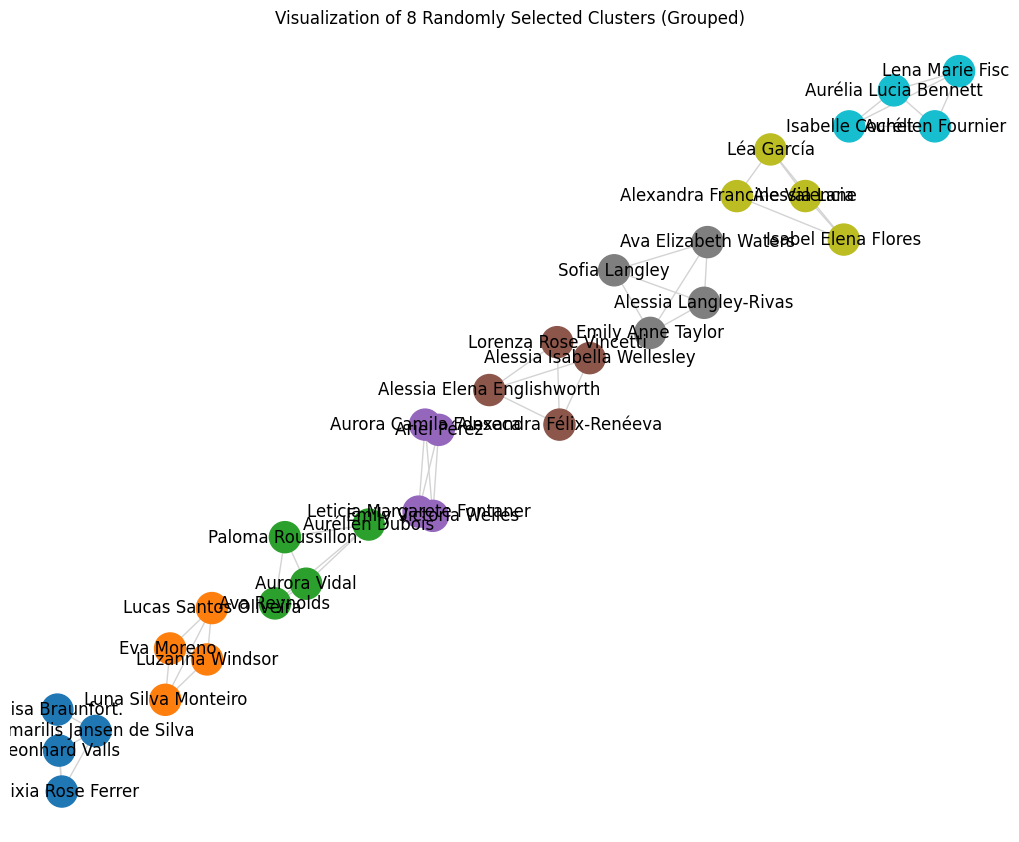

In [14]:
import random

# Visualize a subset of clusters with grouped nodes
def visualize_subset_clusters_grouped(graph, participants: List[Participant], clusters: List[set], subset_size=8):
    # Randomly select a subset of clusters
    selected_clusters = random.sample(clusters, min(subset_size, len(clusters)))

    # Generate colors for the subset
    colors = plt.cm.tab10(np.linspace(0, 1, len(selected_clusters)))

    # Create a position dictionary to ensure cluster grouping
    pos = {}
    base_layout = nx.spring_layout(graph)  # Base layout to guide overall structure

    for cluster_idx, cluster in enumerate(selected_clusters):
        cluster_graph = graph.subgraph(cluster)  # Extract the subgraph for the cluster
        cluster_layout = nx.spring_layout(cluster_graph)  # Layout for the cluster

        # Offset positions of the cluster nodes to group them
        offset = cluster_idx * 2.0  # Adjust this for more spacing between clusters
        for node, position in cluster_layout.items():
            pos[node] = position + [offset, offset]  # Add offset to cluster layout

    # Plot the selected clusters
    plt.figure(figsize=(10, 8))
    for i, cluster in enumerate(selected_clusters):
        cluster_names = [participants[node].name for node in cluster]
        nx.draw(
            graph.subgraph(cluster),
            pos=pos,
            node_color=[colors[i]] * len(cluster),
            labels={node: participants[node].name for node in cluster},
            with_labels=True,
            node_size=500,
            edge_color="lightgray"
        )
        print(f"Cluster {i+1}: {', '.join(cluster_names)}")

    plt.title(f"Visualization of {len(selected_clusters)} Randomly Selected Clusters (Grouped)")
    plt.show()

# Visualize a random subset of 8 clusters with grouping
visualize_subset_clusters_grouped(graph, participants, clusters, subset_size=8)


### Visualize Clusters for Specific Students

Cluster 1: Emma Winters, Sara Mas, Ava Elizabeth Wells, Coralina Elena Soto

Cluster 2: Nadia Elara Santos, Pilar Cristina Fletcher, Emily Wynter, Sophie Dumont

Cluster 3: Elisabet Fontrodona, Marc González Rodríguez, Sònia Rose Ellis, Ariane Font-Rosa

Cluster 4: Ava Rodriguez, Emily Sanchez, Aurora Valencia, Sophia Adriana Montesano

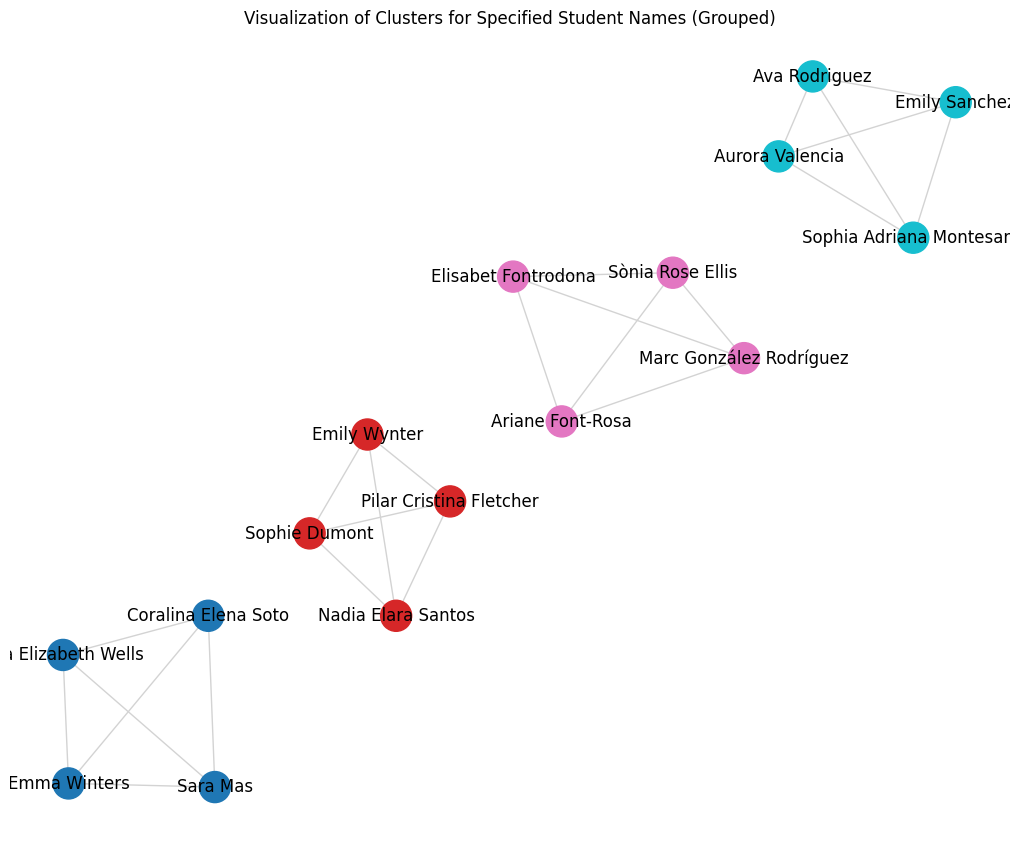

In [15]:
# Visualize clusters based on specific student names with grouped nodes
def visualize_specific_clusters_grouped(graph, participants: List[Participant], clusters: List[set], student_names: List[str]):
    # Create a mapping of participant names to their indices
    name_to_index = {participant.name: idx for idx, participant in enumerate(participants)}

    # Find the indices of the specified student names
    target_indices = [name_to_index[name] for name in student_names if name in name_to_index]
    if not target_indices:
        print("No participants found with the specified names.")
        return

    # Find clusters containing the target indices
    selected_clusters = [
        cluster for cluster in clusters if any(node in target_indices for node in cluster)
    ]

    if not selected_clusters:
        print("No clusters found containing the specified students.")
        return

    # Generate colors for the subset
    colors = plt.cm.tab10(np.linspace(0, 1, len(selected_clusters)))

    # Create a position dictionary to ensure cluster grouping
    pos = {}
    base_layout = nx.spring_layout(graph)  # Base layout to guide overall structure

    for cluster_idx, cluster in enumerate(selected_clusters):
        cluster_graph = graph.subgraph(cluster)  # Extract the subgraph for the cluster
        cluster_layout = nx.spring_layout(cluster_graph)  # Layout for the cluster

        # Offset positions of the cluster nodes to group them
        offset = cluster_idx * 2.0  # Adjust this for more spacing between clusters
        for node, position in cluster_layout.items():
            pos[node] = position + [offset, offset]  # Add offset to cluster layout

    # Plot the selected clusters
    plt.figure(figsize=(10, 8))
    for i, cluster in enumerate(selected_clusters):
        cluster_names = [participants[node].name for node in cluster]
        nx.draw(
            graph.subgraph(cluster),
            pos=pos,
            node_color=[colors[i]] * len(cluster),
            labels={node: participants[node].name for node in cluster},
            with_labels=True,
            node_size=500,
            edge_color="lightgray"
        )
        print(f"Cluster {i+1}: {', '.join(cluster_names)}")

    plt.title(f"Visualization of Clusters for Specified Student Names (Grouped)")
    plt.show()

# Example: Visualize clusters containing specific students by name with grouping
specific_student_names = ["Emma Winters", "Sophie Dumont", "Elisabet Fontrodona", "Ava Rodriguez"]
visualize_specific_clusters_grouped(graph, participants, clusters, specific_student_names)


### Visualize Specific Clusters

In [16]:
# Visualize clusters based on specific student names
def visualize_cluster_names(participants: List[Participant], clusters: List[set], names: List[str]):
    # Map participant names to indices
    name_to_index = {p.name: i for i, p in enumerate(participants)}

    # Find clusters for the specified names
    selected_indices = [name_to_index[name] for name in names if name in name_to_index]
    selected_clusters = [
        cluster for cluster in clusters if any(idx in selected_indices for idx in cluster)
    ]

    for cluster in selected_clusters:
        cluster_names = [participants[idx].name for idx in cluster]
        print(f"Cluster: {', '.join(cluster_names)}")

# Example: Names of students to visualize clusters
specific_names = ["Emma Winters", "Sophie Dumont", "Elisabet Fontrodona", "Ava Rodriguez"]
visualize_cluster_names(participants, clusters, specific_names)


Cluster: Emma Winters, Sara Mas, Ava Elizabeth Wells, Coralina Elena Soto

Cluster: Nadia Elara Santos, Pilar Cristina Fletcher, Emily Wynter, Sophie Dumont

Cluster: Elisabet Fontrodona, Marc González Rodríguez, Sònia Rose Ellis, Ariane Font-Rosa

Cluster: Ava Rodriguez, Emily Sanchez, Aurora Valencia, Sophia Adriana Montesano

### Display Cluster Names for Specific Students

In [17]:
# Function to find and display the cluster names for specific students
def display_cluster_names_by_student_names(participants: List[Participant], clusters: List[set], student_names: List[str]):
    # Create a mapping of participant names to their indices
    name_to_index = {participant.name: idx for idx, participant in enumerate(participants)}

    # Find the indices of the specified student names
    target_indices = [name_to_index[name] for name in student_names if name in name_to_index]
    if not target_indices:
        print("No participants found with the specified names.")
        return

    # Find clusters containing the target indices
    clusters_to_display = [
        cluster for cluster in clusters if any(index in target_indices for index in cluster)
    ]

    if not clusters_to_display:
        print("No clusters found for the specified students.")
        return

    # Get the names of all students in those clusters
    cluster_names = []
    for cluster in clusters_to_display:
        cluster_names.append([participants[index].name for index in cluster])

    # Display the results
    for i, names in enumerate(cluster_names, start=1):
        print(f"Cluster {i}: {', '.join(names)}")

# Example: Names of students to display their clusters
specific_student_names = ["Emilia Windsor", "Sophie Casals-Fourcade", "Sofia Martínez García", "Alessia Caterina García"]
display_cluster_names_by_student_names(participants, clusters, specific_student_names)


Cluster 1: Eleanor Silva Alves, Aurèlia Sofia Wellesley, Emilia Windsor, Evelyn Sawyer

Cluster 2: Sophie Casals-Fourcade, Evelyn Ruby Wright, Leilani Élise Francalatte, Mercè Ellis

Cluster 3: Rebecca Thompson, Sofia Corbera, Alessia Caterina García, Aurélie Montserrat Collins

Cluster 4: Sofia Martínez García, Laurencia Blanchet-Foucher, Aurélie Elena Langley, Luna Bianchi

### Display Clustering Details

In [18]:
import random

# Function to calculate distances between participants
def calculate_distance_matrix(participants: List[Participant]) -> np.ndarray:
    num_participants = len(participants)
    distance_matrix = np.zeros((num_participants, num_participants))

    for i, p1 in enumerate(participants):
        for j, p2 in enumerate(participants):
            if i != j:
                distance_matrix[i, j] = compute_distance(p1, p2)

    return distance_matrix

# Function to display clustering details
def display_cluster_details(participants: List[Participant], clusters: List[set], student_names: List[str]):
    # Create a mapping of participant names to their indices
    name_to_index = {participant.name: idx for idx, participant in enumerate(participants)}

    # Compute the distance matrix
    distance_matrix = calculate_distance_matrix(participants)

    # Find the indices of the specified student names
    target_indices = [name_to_index[name] for name in student_names if name in name_to_index]
    if not target_indices:
        print("No participants found with the specified names.")
        return

    # Find clusters containing the target indices
    clusters_to_display = [
        cluster for cluster in clusters if any(index in target_indices for index in cluster)
    ]

    if not clusters_to_display:
        print("No clusters found for the specified students.")
        return

    for i, cluster in enumerate(clusters_to_display, start=1):
        print(f"\nCluster {i}:")
        cluster_names = [participants[index].name for index in cluster]
        print(f"Students in cluster: {', '.join(cluster_names)}")

        print("\nPairwise distances within the cluster:")
        for index1 in cluster:
            for index2 in cluster:
                if index1 != index2:
                    print(
                        f"Distance between {participants[index1].name} and {participants[index2].name}: "
                        f"{distance_matrix[index1, index2]:.2f}"
                    )

        # Compare distances to a random student in another cluster
        other_clusters = [c for c in clusters if c != cluster]
        if other_clusters:
            random_other_cluster = random.choice(other_clusters)
            random_other_student = random.choice(list(random_other_cluster))
            for index in cluster:
                print(
                    f"Distance between {participants[index].name} "
                    f"and {participants[random_other_student].name} (from another cluster): "
                    f"{distance_matrix[index, random_other_student]:.2f}"
                )

# Example: Names of students to display their clusters
specific_student_names = ["Emma Winters", "Sophie Dumont", "Elisabet Fontrodona", "Ava Rodriguez"]
display_cluster_details(participants, clusters, specific_student_names)


Cluster 1:

Students in cluster: Emma Winters, Sara Mas, Ava Elizabeth Wells, Coralina Elena Soto

Pairwise distances within the cluster:

Distance between Emma Winters and Sara Mas: 1.33

Distance between Emma Winters and Ava Elizabeth Wells: 0.71

Distance between Emma Winters and Coralina Elena Soto: 0.63

Distance between Sara Mas and Emma Winters: 1.33

Distance between Sara Mas and Ava Elizabeth Wells: 0.82

Distance between Sara Mas and Coralina Elena Soto: 0.30

Distance between Ava Elizabeth Wells and Emma Winters: 0.71

Distance between Ava Elizabeth Wells and Sara Mas: 0.82

Distance between Ava Elizabeth Wells and Coralina Elena Soto: 1.12

Distance between Coralina Elena Soto and Emma Winters: 0.63

Distance between Coralina Elena Soto and Sara Mas: 0.30

Distance between Coralina Elena Soto and Ava Elizabeth Wells: 1.12

Distance between Emma Winters and Alisha Kurosawa (from another cluster): 2.53

Distance between Sara Mas and Alisha Kurosawa (from another cluster): 2.20

Distance between Ava Elizabeth Wells and Alisha Kurosawa (from another cluster): 3.02

Distance between Coralina Elena Soto and Alisha Kurosawa (from another cluster): 2.90

Cluster 2:

Students in cluster: Nadia Elara Santos, Pilar Cristina Fletcher, Emily Wynter, Sophie Dumont

Pairwise distances within the cluster:

Distance between Nadia Elara Santos and Pilar Cristina Fletcher: 1.07

Distance between Nadia Elara Santos and Emily Wynter: 0.80

Distance between Nadia Elara Santos and Sophie Dumont: 1.75

Distance between Pilar Cristina Fletcher and Nadia Elara Santos: 1.07

Distance between Pilar Cristina Fletcher and Emily Wynter: 2.67

Distance between Pilar Cristina Fletcher and Sophie Dumont: 2.32

Distance between Emily Wynter and Nadia Elara Santos: 0.80

Distance between Emily Wynter and Pilar Cristina Fletcher: 2.67

Distance between Emily Wynter and Sophie Dumont: 1.55

Distance between Sophie Dumont and Nadia Elara Santos: 1.75

Distance between Sophie Dumont and Pilar Cristina Fletcher: 2.32

Distance between Sophie Dumont and Emily Wynter: 1.55

Distance between Nadia Elara Santos and Mercè Colomera Ferrer (from another cluster): 2.74

Distance between Pilar Cristina Fletcher and Mercè Colomera Ferrer (from another cluster): 3.37

Distance between Emily Wynter and Mercè Colomera Ferrer (from another cluster): 3.54

Distance between Sophie Dumont and Mercè Colomera Ferrer (from another cluster): 3.49

Cluster 3:

Students in cluster: Elisabet Fontrodona, Marc González Rodríguez, Sònia Rose Ellis, Ariane Font-Rosa

Pairwise distances within the cluster:

Distance between Elisabet Fontrodona and Marc González Rodríguez: 0.77

Distance between Elisabet Fontrodona and Sònia Rose Ellis: 0.50

Distance between Elisabet Fontrodona and Ariane Font-Rosa: 0.45

Distance between Marc González Rodríguez and Elisabet Fontrodona: 0.77

Distance between Marc González Rodríguez and Sònia Rose Ellis: 1.27

Distance between Marc González Rodríguez and Ariane Font-Rosa: 0.32

Distance between Sònia Rose Ellis and Elisabet Fontrodona: 0.50

Distance between Sònia Rose Ellis and Marc González Rodríguez: 1.27

Distance between Sònia Rose Ellis and Ariane Font-Rosa: 0.95

Distance between Ariane Font-Rosa and Elisabet Fontrodona: 0.45

Distance between Ariane Font-Rosa and Marc González Rodríguez: 0.32

Distance between Ariane Font-Rosa and Sònia Rose Ellis: 0.95

Distance between Elisabet Fontrodona and Sofia Riviere Lluís (from another cluster): 2.05

Distance between Marc González Rodríguez and Sofia Riviere Lluís (from another cluster): 3.32

Distance between Sònia Rose Ellis and Sofia Riviere Lluís (from another cluster): 1.55

Distance between Ariane Font-Rosa and Sofia Riviere Lluís (from another cluster): 2.00

Cluster 4:

Students in cluster: Ava Rodriguez, Emily Sanchez, Aurora Valencia, Sophia Adriana Montesano

Pairwise distances within the cluster:

Distance between Ava Rodriguez and Emily Sanchez: 0.53

Distance between Ava Rodriguez and Aurora Valencia: 1.50

Distance between Ava Rodriguez and Sophia Adriana Montesano: 0.41

Distance between Emily Sanchez and Ava Rodriguez: 0.53

Distance between Emily Sanchez and Aurora Valencia: 0.63

Distance between Emily Sanchez and Sophia Adriana Montesano: 0.32

Distance between Aurora Valencia and Ava Rodriguez: 1.50

Distance between Aurora Valencia and Emily Sanchez: 0.63

Distance between Aurora Valencia and Sophia Adriana Montesano: 0.31

Distance between Sophia Adriana Montesano and Ava Rodriguez: 0.41

Distance between Sophia Adriana Montesano and Emily Sanchez: 0.32

Distance between Sophia Adriana Montesano and Aurora Valencia: 0.31

Distance between Ava Rodriguez and Alexandra Wellesley (from another cluster): 2.86

Distance between Emily Sanchez and Alexandra Wellesley (from another cluster): 2.32

Distance between Aurora Valencia and Alexandra Wellesley (from another cluster): 2.36

Distance between Sophia Adriana Montesano and Alexandra Wellesley (from another cluster): 2.44

### Visualization of Distances between Students of Same Cluster and Different Cluster

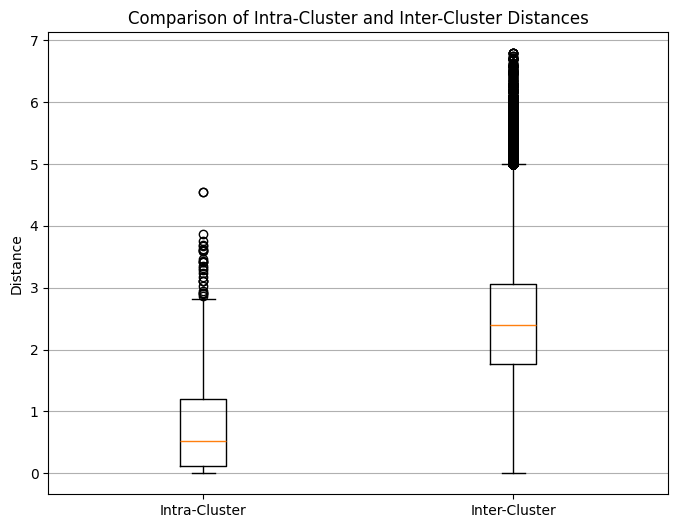

In [19]:
import matplotlib.pyplot as plt

# Function to calculate distances and visualize
def visualize_cluster_distances(participants: List[Participant], clusters: List[set]):
    # Compute the distance matrix
    distance_matrix = calculate_distance_matrix(participants)

    # Separate intra-cluster and inter-cluster distances
    intra_cluster_distances = []
    inter_cluster_distances = []

    for cluster in clusters:
        # Collect intra-cluster distances
        cluster = list(cluster)
        for i in range(len(cluster)):
            for j in range(i + 1, len(cluster)):
                intra_cluster_distances.append(distance_matrix[cluster[i], cluster[j]])

        # Collect inter-cluster distances
        other_clusters = [c for c in clusters if c != set(cluster)]
        for index in cluster:
            for other_cluster in other_clusters:
                for other_index in other_cluster:
                    inter_cluster_distances.append(distance_matrix[index, other_index])

    # Prepare data for visualization
    data = [intra_cluster_distances, inter_cluster_distances]
    labels = ['Intra-Cluster', 'Inter-Cluster']

    # Create boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(data, labels=labels)
    plt.title('Comparison of Intra-Cluster and Inter-Cluster Distances')
    plt.ylabel('Distance')
    plt.grid(axis='y')
    plt.show()

# Call the visualization function
visualize_cluster_distances(participants, clusters)


### Violin-Plot

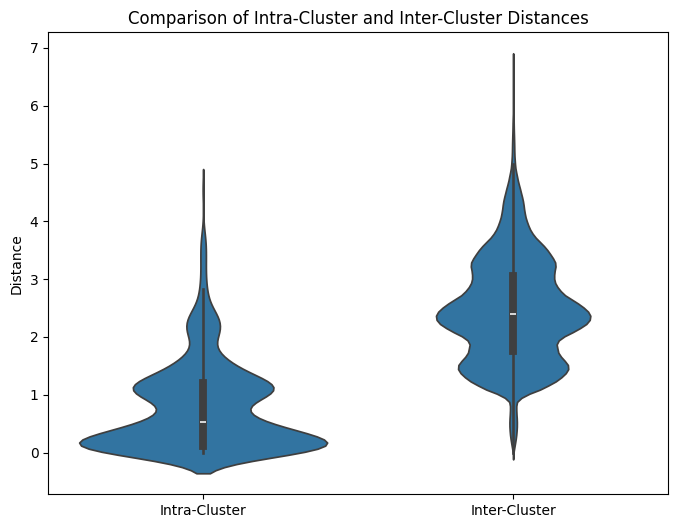

In [20]:
import seaborn as sns

# Create a violin plot
def visualize_cluster_distances_violin(participants: List[Participant], clusters: List[set]):
    # Compute the distance matrix
    distance_matrix = calculate_distance_matrix(participants)

    # Separate intra-cluster and inter-cluster distances
    intra_cluster_distances = []
    inter_cluster_distances = []

    for cluster in clusters:
        cluster = list(cluster)
        for i in range(len(cluster)):
            for j in range(i + 1, len(cluster)):
                intra_cluster_distances.append(distance_matrix[cluster[i], cluster[j]])

        other_clusters = [c for c in clusters if c != set(cluster)]
        for index in cluster:
            for other_cluster in other_clusters:
                for other_index in other_cluster:
                    inter_cluster_distances.append(distance_matrix[index, other_index])

    # Prepare data for visualization
    distances = intra_cluster_distances + inter_cluster_distances
    labels = ['Intra-Cluster'] * len(intra_cluster_distances) + ['Inter-Cluster'] * len(inter_cluster_distances)

    # Create violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=labels, y=distances)
    plt.title('Comparison of Intra-Cluster and Inter-Cluster Distances')
    plt.ylabel('Distance')
    plt.show()

# Call the violin plot function
visualize_cluster_distances_violin(participants, clusters)


## Project Definition: Initial (Naive) Algorithm with Attribute Weights

### Imports

In [21]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from rich import print
from typing import List, Dict
from sklearn.preprocessing import MinMaxScaler

# Helper function to normalize values to [0, 1]
def normalize(values, min_val=None, max_val=None):
    values = np.array(values, dtype=float)
    min_val = min_val if min_val is not None else values.min()
    max_val = max_val if max_val is not None else values.max()
    return (values - min_val) / (max_val - min_val)

# Mapping for categorical attributes
YEAR_MAPPING = {
    "1st year": 0.0, "2nd year": 0.2, "3rd year": 0.4,
    "4th year": 0.6, "Masters": 0.8, "PhD": 1.0
}
EXPERIENCE_MAPPING = {"Beginner": 0.0, "Intermediate": 0.5, "Advanced": 1.0}


### Load and Preprocess Participants

In [22]:
import json
import uuid
from dataclasses import dataclass
from typing import Dict, List, Literal

# Define Participant class
@dataclass
class Participant:
    id: uuid.UUID  # Unique identifier

    # Personal data
    name: str
    email: str
    age: int
    year_of_study: Literal["1st year", "2nd year", "3rd year", "4th year", "Masters", "PhD"]
    shirt_size: Literal["S", "M", "L", "XL"]
    university: str
    dietary_restrictions: Literal["None", "Vegetarian", "Vegan", "Gluten-free", "Other"]

    # Experience and programming skills
    programming_skills: Dict[str, int]
    experience_level: Literal["Beginner", "Intermediate", "Advanced"]
    hackathons_done: int

    # Interests, preferences and constraints
    interests: List[str]
    preferred_role: Literal[
        "Analysis", "Visualization", "Development", "Design", "Don't know", "Don't care"
    ]
    objective: str
    interest_in_challenges: List[str]
    preferred_languages: List[str]
    friend_registration: List[uuid.UUID]
    preferred_team_size: int
    availability: Dict[str, bool]

    # Description of the participant
    introduction: str
    technical_project: str
    future_excitement: str
    fun_fact: str

# Load participants data
def load_participants(path: str) -> List[Participant]:
    with open(path, 'r') as file:
        return [Participant(**participant) for participant in json.load(file)]

# Normalize and map participant attributes
def preprocess_participants(participants: List[Participant]) -> List[Participant]:
    for participant in participants:
        # Normalize numerical attributes
        participant.age = normalize([participant.age], min_val=17, max_val=27)[0]
        participant.hackathons_done = normalize([participant.hackathons_done], min_val=0, max_val=9)[0]
        participant.preferred_team_size = normalize([participant.preferred_team_size], min_val=0, max_val=4)[0]

        # Map categorical attributes
        participant.year_of_study = YEAR_MAPPING[participant.year_of_study]
        participant.experience_level = EXPERIENCE_MAPPING[participant.experience_level]

    return participants

# Load and preprocess participants
data_path = "datathon_participants.json"
participants = load_participants(data_path)
participants = preprocess_participants(participants)

print(f"Preprocessed {len(participants)} participants.")


Preprocessed 924 participants.

### Compute Weighted Distance

In [23]:
# Compute weighted distance between two participants
def compute_distance(p1: Participant, p2: Participant, weights: Dict[str, float]) -> float:
    distance = 0

    # Continuous attributes with weights
    distance += weights['age'] * abs(p1.age - p2.age)
    distance += weights['hackathons_done'] * abs(p1.hackathons_done - p2.hackathons_done)
    distance += weights['preferred_team_size'] * abs(p1.preferred_team_size - p2.preferred_team_size)
    distance += weights['year_of_study'] * abs(p1.year_of_study - p2.year_of_study)

    # Categorical attributes with weights
    distance += weights['university'] * (0 if p1.university == p2.university else 1)
    distance += weights['dietary_restrictions'] * (0 if p1.dietary_restrictions == p2.dietary_restrictions else 1)
    distance += weights['experience_level'] * abs(p1.experience_level - p2.experience_level)
    distance += weights['preferred_role'] * (0 if p1.preferred_role == p2.preferred_role else 1)

    return distance


### Construct Weighted Similarity Graph

In [24]:
# Construct a similarity graph with weighted distances
def construct_graph(participants: List[Participant], weights: Dict[str, float]) -> nx.Graph:
    graph = nx.Graph()
    for i, p1 in enumerate(participants):
        graph.add_node(i, participant=p1)  # Add participant as a node
        for j, p2 in enumerate(participants):
            if i != j:
                distance = compute_distance(p1, p2, weights)
                graph.add_edge(i, j, weight=distance)
    return graph

# Define weights for attributes
# Valores inferiores a 1 tendrán más impacto en que la distancia final sea pequeña e influirán en que nodos parecidos ( en este atributo ) serán más propensos a estar en el mismo cluster.
# Valores superiores a 1 tendrán más impacto en que la distancia final sea mayor e influirán en que nodos no parecidos (en este atributo ) serán más propensos a estar en clusters distintos.
attribute_weights = {
    'age': 1.0,
    'year_of_study': 0.8,
    'university': 1.2,
    'dietary_restrictions': 0.5,
    'experience_level': 1.0,
    'hackathons_done': 0.7,
    'preferred_role': 0.6,
    'preferred_team_size': 0.9
}



graph = construct_graph(participants, attribute_weights)
print(f"Graph constructed with {len(graph.nodes)} nodes.")


Graph constructed with 924 nodes.

### Form Clusters with Weighted Distances

In [25]:
# Form Clusters based on distances using a Greedy approach
def calculate_distance_matrix(participants: List[Participant], weights: Dict[str, float]) -> np.ndarray:
    num_participants = len(participants)
    distance_matrix = np.zeros((num_participants, num_participants))

    for i, p1 in enumerate(participants):
        for j, p2 in enumerate(participants):
            if i != j:
                distance_matrix[i, j] = compute_distance(p1, p2, weights)

    return distance_matrix

def form_clusters_with_distances(distance_matrix: np.ndarray, max_size=4) -> List[set]:
    num_students = len(distance_matrix)
    unvisited = set(range(num_students))
    clusters = []

    while unvisited:
        # Start a new cluster
        cluster = set()
        # Pick a random starting student
        current_student = unvisited.pop()
        cluster.add(current_student)

        # Add students to the cluster based on minimum distance
        while len(cluster) < max_size and unvisited:
            # Find the closest student to the current cluster
            closest_student = min(
                unvisited,
                key=lambda s: min(distance_matrix[s][c] for c in cluster),
            )
            cluster.add(closest_student)
            unvisited.remove(closest_student)

        clusters.append(cluster)

    return clusters

# Compute the distance matrix
distance_matrix = calculate_distance_matrix(participants, attribute_weights)

# Form clusters using distances
clusters = form_clusters_with_distances(distance_matrix, max_size=4)

print(f"Formed {len(clusters)} clusters based on weighted distances.")


Formed 231 clusters based on weighted distances.

### Visualize Clusters of Random Students

Cluster 1: Ana Lisa Rodriguez, Isabella Rivera, Sofía Ellis, Maria Elena Carson

Cluster 2: Sofía María González, Ava Rivera, Sara Montserrat Estevez, Alessia Morales

Cluster 3: Evelyn Wellesley, Léa Montserrat Flynn, Àngela Elena English, Alexandra Sàlvo

Cluster 4: Ana Sofia Wagner, Ava Rodriguez, Aurélie Rae Valdés, Luna Maria Vogel

Cluster 5: Sofía Emerson, Astrid Sofia Langen, Ana Paula Fraser, Andrés Eduardo Torres Morales

Cluster 6: Aurora Sempere Ferrer, Zoë Émile-Linguate, Sílvia García, Lena Schnell Vallès

Cluster 7: Sofia Rosell Torrente, Ava Lauren Thompson, Aurora Camila Fonseca, Evelyn Sawyer

Cluster 8: Sofía Rodríguez Morales, Alexandra Santos, Lena Santos-Richter, Alessia Langley-Rivas

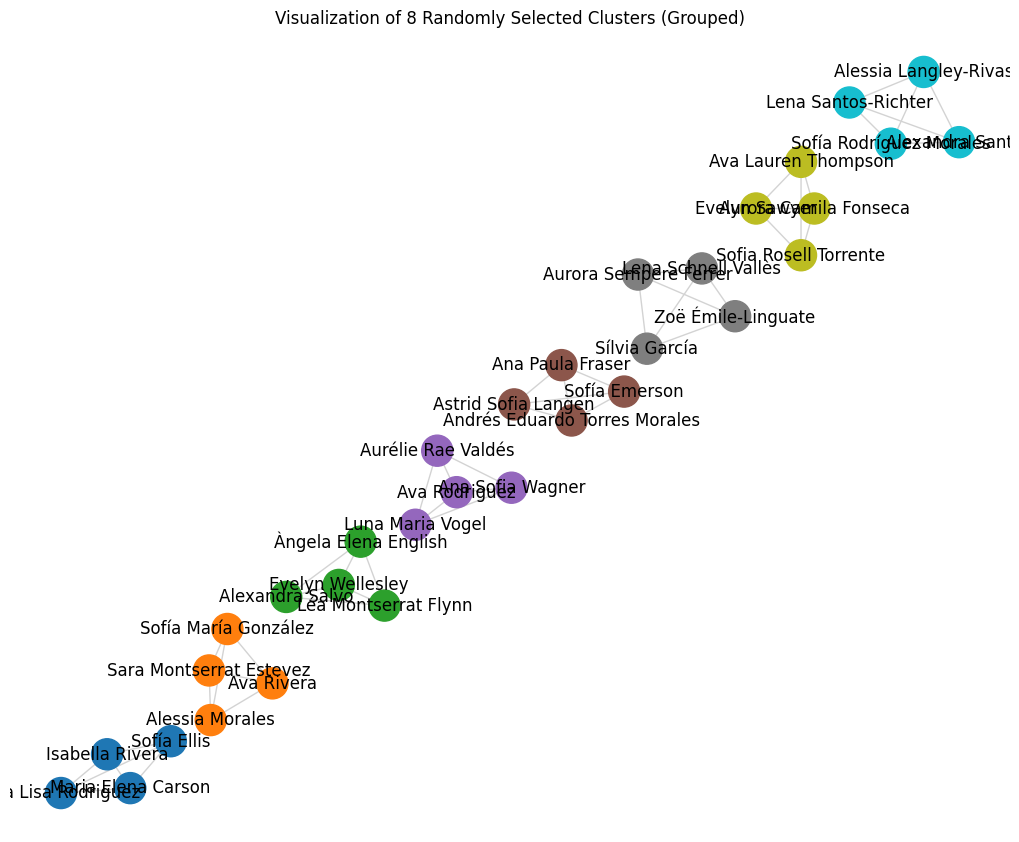

In [ ]:
import random

# Visualize a subset of clusters with grouped nodes
def visualize_subset_clusters_grouped(graph, participants: List[Participant], clusters: List[set], subset_size=8):
    # Randomly select a subset of clusters
    selected_clusters = random.sample(clusters, min(subset_size, len(clusters)))

    # Generate colors for the subset
    colors = plt.cm.tab10(np.linspace(0, 1, len(selected_clusters)))

    # Create a position dictionary to ensure cluster grouping
    pos = {}
    base_layout = nx.spring_layout(graph)  # Base layout to guide overall structure

    for cluster_idx, cluster in enumerate(selected_clusters):
        cluster_graph = graph.subgraph(cluster)  # Extract the subgraph for the cluster
        cluster_layout = nx.spring_layout(cluster_graph)  # Layout for the cluster

        # Offset positions of the cluster nodes to group them
        offset = cluster_idx * 2.0  # Adjust this for more spacing between clusters
        for node, position in cluster_layout.items():
            pos[node] = position + [offset, offset]  # Add offset to cluster layout

    # Plot the selected clusters
    plt.figure(figsize=(10, 8))
    for i, cluster in enumerate(selected_clusters):
        cluster_names = [participants[node].name for node in cluster]
        nx.draw(
            graph.subgraph(cluster),
            pos=pos,
            node_color=[colors[i]] * len(cluster),
            labels={node: participants[node].name for node in cluster},
            with_labels=True,
            node_size=500,
            edge_color="lightgray"
        )
        print(f"Cluster {i+1}: {', '.join(cluster_names)}")

    plt.title(f"Visualization of {len(selected_clusters)} Randomly Selected Clusters (Grouped)")
    plt.show()

# Visualize a random subset of 8 clusters with grouping
visualize_subset_clusters_grouped(graph, participants, clusters, subset_size=8)


### Visualize Clusters Based on Specific Student Names

Cluster 1: Sara Mas, Emma Winters, Maria Sofia Rodriguez, Ruby Wynter

Cluster 2: Ana Sofia Wagner, Ava Rodriguez, Aurélie Rae Valdés, Luna Maria Vogel

Cluster 3: Pilar Rodríguez Español, Ariadna Solà, Evelyn Alexandra Reed, Sophie Dumont

Cluster 4: Elisabet Fontrodona, Maria Solé, Ava Thompson, Alejandra Pérez

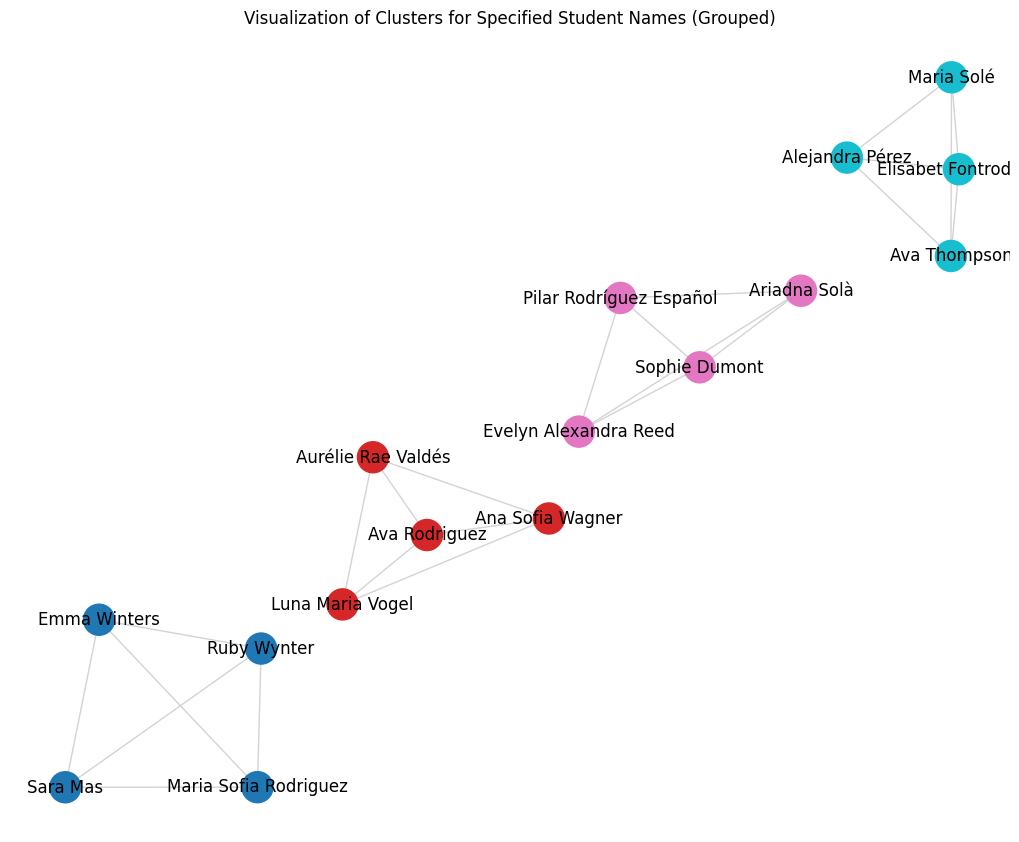

In [ ]:
# Visualize clusters based on specific student names with grouped nodes
def visualize_specific_clusters_grouped(graph, participants: List[Participant], clusters: List[set], student_names: List[str]):
    # Create a mapping of participant names to their indices
    name_to_index = {participant.name: idx for idx, participant in enumerate(participants)}

    # Find the indices of the specified student names
    target_indices = [name_to_index[name] for name in student_names if name in name_to_index]
    if not target_indices:
        print("No participants found with the specified names.")
        return

    # Find clusters containing the target indices
    selected_clusters = [
        cluster for cluster in clusters if any(node in target_indices for node in cluster)
    ]

    if not selected_clusters:
        print("No clusters found containing the specified students.")
        return

    # Generate colors for the subset
    colors = plt.cm.tab10(np.linspace(0, 1, len(selected_clusters)))

    # Create a position dictionary to ensure cluster grouping
    pos = {}
    base_layout = nx.spring_layout(graph)  # Base layout to guide overall structure

    for cluster_idx, cluster in enumerate(selected_clusters):
        cluster_graph = graph.subgraph(cluster)  # Extract the subgraph for the cluster
        cluster_layout = nx.spring_layout(cluster_graph)  # Layout for the cluster

        # Offset positions of the cluster nodes to group them
        offset = cluster_idx * 2.0  # Adjust this for more spacing between clusters
        for node, position in cluster_layout.items():
            pos[node] = position + [offset, offset]  # Add offset to cluster layout

    # Plot the selected clusters
    plt.figure(figsize=(10, 8))
    for i, cluster in enumerate(selected_clusters):
        cluster_names = [participants[node].name for node in cluster]
        nx.draw(
            graph.subgraph(cluster),
            pos=pos,
            node_color=[colors[i]] * len(cluster),
            labels={node: participants[node].name for node in cluster},
            with_labels=True,
            node_size=500,
            edge_color="lightgray"
        )
        print(f"Cluster {i+1}: {', '.join(cluster_names)}")

    plt.title(f"Visualization of Clusters for Specified Student Names (Grouped)")
    plt.show()

# Example: Visualize clusters containing specific students by name with grouping
specific_student_names = ["Emma Winters", "Sophie Dumont", "Elisabet Fontrodona", "Ava Rodriguez"]
visualize_specific_clusters_grouped(graph, participants, clusters, specific_student_names)


### Display Cluster Names

In [ ]:
# Display cluster names for specific students
def visualize_cluster_names(participants: List[Participant], clusters: List[set], names: List[str]):
    # Map participant names to indices
    name_to_index = {p.name: i for i, p in enumerate(participants)}

    # Find clusters for the specified names
    selected_indices = [name_to_index[name] for name in names if name in name_to_index]
    selected_clusters = [
        cluster for cluster in clusters if any(idx in selected_indices for idx in cluster)
    ]

    for cluster in selected_clusters:
        cluster_names = [participants[idx].name for idx in cluster]
        print(f"Cluster: {', '.join(cluster_names)}")

# Example: Names of students to visualize clusters
specific_names = ["Emma Winters", "Sophie Dumont", "Elisabet Fontrodona", "Ava Rodriguez"]
visualize_cluster_names(participants, clusters, specific_names)


Cluster: Sara Mas, Emma Winters, Maria Sofia Rodriguez, Ruby Wynter

Cluster: Ana Sofia Wagner, Ava Rodriguez, Aurélie Rae Valdés, Luna Maria Vogel

Cluster: Pilar Rodríguez Español, Ariadna Solà, Evelyn Alexandra Reed, Sophie Dumont

Cluster: Elisabet Fontrodona, Maria Solé, Ava Thompson, Alejandra Pérez

### Display Cluster Names for Specific Students

In [ ]:
# Function to find and display the cluster names for specific students
def display_cluster_names_by_student_names(participants: List[Participant], clusters: List[set], student_names: List[str]):
    # Create a mapping of participant names to their indices
    name_to_index = {participant.name: idx for idx, participant in enumerate(participants)}

    # Find the indices of the specified student names
    target_indices = [name_to_index[name] for name in student_names if name in name_to_index]
    if not target_indices:
        print("No participants found with the specified names.")
        return

    # Find clusters containing the target indices
    clusters_to_display = [
        cluster for cluster in clusters if any(index in target_indices for index in cluster)
    ]

    if not clusters_to_display:
        print("No clusters found for the specified students.")
        return

    # Get the names of all students in those clusters
    cluster_names = []
    for cluster in clusters_to_display:
        cluster_names.append([participants[index].name for index in cluster])

    # Display the results
    for i, names in enumerate(cluster_names, start=1):
        print(f"Cluster {i}: {', '.join(names)}")

# Example: Names of students to display their clusters
specific_student_names = ["Emilia Windsor", "Sophie Casals-Fourcade", "Sofia Martínez García", "Alessia Caterina García"]
display_cluster_names_by_student_names(participants, clusters, specific_student_names)


Cluster 1: Sophie Casals-Fourcade, Emília Laurent Blanchard, Mercè Ellis, Avery Winston

Cluster 2: Alessia Caterina García, Ava Lane, Carla Estela Moreau, Ariadna Baines

Cluster 3: Sofia Martínez García, Aurélien Sophia Lane, Aurélie Elena Langley, Luna Bianchi

Cluster 4: Sofía Elżbieta Vazquez, Leonharda Catalina Wielenga, Léonara Fontcuberta, Emilia Windsor

### Display Clustering Details

In [ ]:
import random

# Function to calculate distances between participants
def calculate_distance_matrix(participants: List[Participant], weights: Dict[str, float]) -> np.ndarray:
    num_participants = len(participants)
    distance_matrix = np.zeros((num_participants, num_participants))

    for i, p1 in enumerate(participants):
        for j, p2 in enumerate(participants):
            if i != j:
                distance_matrix[i, j] = compute_distance(p1, p2, weights)

    return distance_matrix

# Function to display clustering details
def display_cluster_details(participants: List[Participant], clusters: List[set], student_names: List[str], weights: Dict[str, float]):
    # Create a mapping of participant names to their indices
    name_to_index = {participant.name: idx for idx, participant in enumerate(participants)}

    # Compute the distance matrix
    distance_matrix = calculate_distance_matrix(participants, weights)

    # Find the indices of the specified student names
    target_indices = [name_to_index[name] for name in student_names if name in name_to_index]
    if not target_indices:
        print("No participants found with the specified names.")
        return

    # Find clusters containing the target indices
    clusters_to_display = [
        cluster for cluster in clusters if any(index in target_indices for index in cluster)
    ]

    if not clusters_to_display:
        print("No clusters found for the specified students.")
        return

    for i, cluster in enumerate(clusters_to_display, start=1):
        print(f"\nCluster {i}:")
        cluster_names = [participants[index].name for index in cluster]
        print(f"Students in cluster: {', '.join(cluster_names)}")

        print("\nPairwise distances within the cluster:")
        for index1 in cluster:
            for index2 in cluster:
                if index1 != index2:
                    print(
                        f"Distance between {participants[index1].name} and {participants[index2].name}: "
                        f"{distance_matrix[index1, index2]:.2f}"
                    )

        # Compare distances to a random student in another cluster
        other_clusters = [c for c in clusters if c != cluster]
        if other_clusters:
            random_other_cluster = random.choice(other_clusters)
            random_other_student = random.choice(list(random_other_cluster))
            for index in cluster:
                print(
                    f"Distance between {participants[index].name} "
                    f"and {participants[random_other_student].name} (from another cluster): "
                    f"{distance_matrix[index, random_other_student]:.2f}"
                )

# Example: Names of students to display their clusters
specific_student_names = ["Emma Winters", "Sophie Dumont", "Elisabet Fontrodona", "Ava Rodriguez"]
display_cluster_details(participants, clusters, specific_student_names, attribute_weights)


Cluster 1:

Students in cluster: Sara Mas, Emma Winters, Maria Sofia Rodriguez, Ruby Wynter

Pairwise distances within the cluster:

Distance between Sara Mas and Emma Winters: 0.23

Distance between Sara Mas and Maria Sofia Rodriguez: 0.68

Distance between Sara Mas and Ruby Wynter: 0.94

Distance between Emma Winters and Sara Mas: 0.23

Distance between Emma Winters and Maria Sofia Rodriguez: 0.91

Distance between Emma Winters and Ruby Wynter: 1.02

Distance between Maria Sofia Rodriguez and Sara Mas: 0.68

Distance between Maria Sofia Rodriguez and Emma Winters: 0.91

Distance between Maria Sofia Rodriguez and Ruby Wynter: 0.42

Distance between Ruby Wynter and Sara Mas: 0.94

Distance between Ruby Wynter and Emma Winters: 1.02

Distance between Ruby Wynter and Maria Sofia Rodriguez: 0.42

Distance between Sara Mas and Camila Alexandra Martin (from another cluster): 2.06

Distance between Emma Winters and Camila Alexandra Martin (from another cluster): 2.29

Distance between Maria Sofia Rodriguez and Camila Alexandra Martin (from another cluster): 2.24

Distance between Ruby Wynter and Camila Alexandra Martin (from another cluster): 2.50

Cluster 2:

Students in cluster: Ana Sofia Wagner, Ava Rodriguez, Aurélie Rae Valdés, Luna Maria Vogel

Pairwise distances within the cluster:

Distance between Ana Sofia Wagner and Ava Rodriguez: 0.90

Distance between Ana Sofia Wagner and Aurélie Rae Valdés: 0.39

Distance between Ana Sofia Wagner and Luna Maria Vogel: 0.26

Distance between Ava Rodriguez and Ana Sofia Wagner: 0.90

Distance between Ava Rodriguez and Aurélie Rae Valdés: 1.14

Distance between Ava Rodriguez and Luna Maria Vogel: 0.80

Distance between Aurélie Rae Valdés and Ana Sofia Wagner: 0.39

Distance between Aurélie Rae Valdés and Ava Rodriguez: 1.14

Distance between Aurélie Rae Valdés and Luna Maria Vogel: 0.33

Distance between Luna Maria Vogel and Ana Sofia Wagner: 0.26

Distance between Luna Maria Vogel and Ava Rodriguez: 0.80

Distance between Luna Maria Vogel and Aurélie Rae Valdés: 0.33

Distance between Ana Sofia Wagner and Aura Victòria Estévez (from another cluster): 2.74

Distance between Ava Rodriguez and Aura Victòria Estévez (from another cluster): 2.29

Distance between Aurélie Rae Valdés and Aura Victòria Estévez (from another cluster): 2.97

Distance between Luna Maria Vogel and Aura Victòria Estévez (from another cluster): 2.64

Cluster 3:

Students in cluster: Pilar Rodríguez Español, Ariadna Solà, Evelyn Alexandra Reed, Sophie Dumont

Pairwise distances within the cluster:

Distance between Pilar Rodríguez Español and Ariadna Solà: 0.58

Distance between Pilar Rodríguez Español and Evelyn Alexandra Reed: 0.50

Distance between Pilar Rodríguez Español and Sophie Dumont: 1.66

Distance between Ariadna Solà and Pilar Rodríguez Español: 0.58

Distance between Ariadna Solà and Evelyn Alexandra Reed: 0.08

Distance between Ariadna Solà and Sophie Dumont: 1.24

Distance between Evelyn Alexandra Reed and Pilar Rodríguez Español: 0.50

Distance between Evelyn Alexandra Reed and Ariadna Solà: 0.08

Distance between Evelyn Alexandra Reed and Sophie Dumont: 1.16

Distance between Sophie Dumont and Pilar Rodríguez Español: 1.66

Distance between Sophie Dumont and Ariadna Solà: 1.24

Distance between Sophie Dumont and Evelyn Alexandra Reed: 1.16

Distance between Pilar Rodríguez Español and Eva Ríos Morales (from another cluster): 2.79

Distance between Ariadna Solà and Eva Ríos Morales (from another cluster): 3.22

Distance between Evelyn Alexandra Reed and Eva Ríos Morales (from another cluster): 3.29

Distance between Sophie Dumont and Eva Ríos Morales (from another cluster): 4.46

Cluster 4:

Students in cluster: Elisabet Fontrodona, Maria Solé, Ava Thompson, Alejandra Pérez

Pairwise distances within the cluster:

Distance between Elisabet Fontrodona and Maria Solé: 0.50

Distance between Elisabet Fontrodona and Ava Thompson: 0.60

Distance between Elisabet Fontrodona and Alejandra Pérez: 0.83

Distance between Maria Solé and Elisabet Fontrodona: 0.50

Distance between Maria Solé and Ava Thompson: 0.10

Distance between Maria Solé and Alejandra Pérez: 0.33

Distance between Ava Thompson and Elisabet Fontrodona: 0.60

Distance between Ava Thompson and Maria Solé: 0.10

Distance between Ava Thompson and Alejandra Pérez: 0.23

Distance between Alejandra Pérez and Elisabet Fontrodona: 0.83

Distance between Alejandra Pérez and Maria Solé: 0.33

Distance between Alejandra Pérez and Ava Thompson: 0.23

Distance between Elisabet Fontrodona and Katja Schnell (from another cluster): 2.34

Distance between Maria Solé and Katja Schnell (from another cluster): 1.84

Distance between Ava Thompson and Katja Schnell (from another cluster): 1.94

Distance between Alejandra Pérez and Katja Schnell (from another cluster): 1.86

### Box-Plot

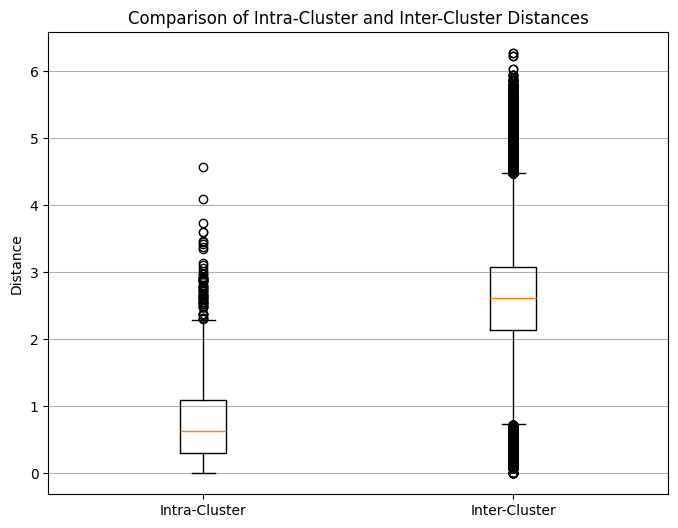

In [26]:
import matplotlib.pyplot as plt

# Visualize intra-cluster and inter-cluster distances using a box plot
def visualize_distances_boxplot(participants: List[Participant], clusters: List[set], weights: Dict[str, float]):
    # Compute the distance matrix
    distance_matrix = calculate_distance_matrix(participants, weights)

    # Separate intra-cluster and inter-cluster distances
    intra_cluster_distances = []
    inter_cluster_distances = []

    for cluster in clusters:
        cluster = list(cluster)
        for i in range(len(cluster)):
            for j in range(i + 1, len(cluster)):
                # Intra-cluster distance
                intra_cluster_distances.append(distance_matrix[cluster[i], cluster[j]])

        # Inter-cluster distances
        other_clusters = [c for c in clusters if c != set(cluster)]
        for index in cluster:
            for other_cluster in other_clusters:
                for other_index in other_cluster:
                    inter_cluster_distances.append(distance_matrix[index, other_index])

    # Prepare data for visualization
    data = [intra_cluster_distances, inter_cluster_distances]
    labels = ['Intra-Cluster', 'Inter-Cluster']

    # Create box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(data, labels=labels)
    plt.title('Comparison of Intra-Cluster and Inter-Cluster Distances')
    plt.ylabel('Distance')
    plt.grid(axis='y')
    plt.show()

# Example usage:
visualize_distances_boxplot(participants, clusters, attribute_weights)


### Violin Plot

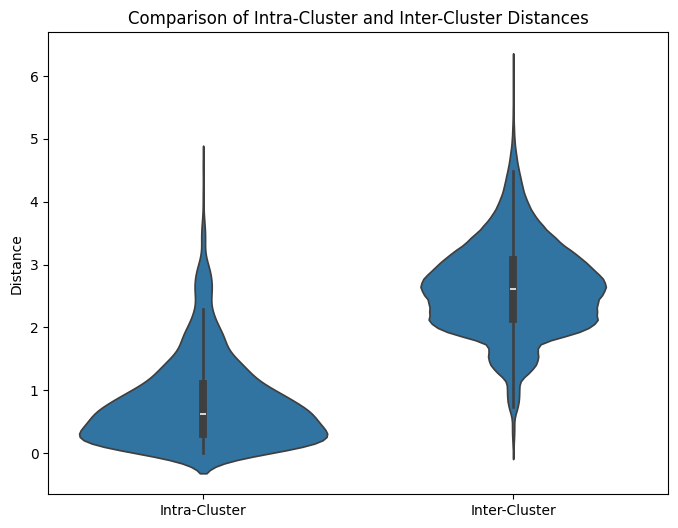

In [27]:
import seaborn as sns

# Visualize intra-cluster and inter-cluster distances using a violin plot
def visualize_distances_violinplot(participants: List[Participant], clusters: List[set], weights: Dict[str, float]):
    # Compute the distance matrix
    distance_matrix = calculate_distance_matrix(participants, weights)

    # Separate intra-cluster and inter-cluster distances
    intra_cluster_distances = []
    inter_cluster_distances = []

    for cluster in clusters:
        cluster = list(cluster)
        for i in range(len(cluster)):
            for j in range(i + 1, len(cluster)):
                # Intra-cluster distance
                intra_cluster_distances.append(distance_matrix[cluster[i], cluster[j]])

        # Inter-cluster distances
        other_clusters = [c for c in clusters if c != set(cluster)]
        for index in cluster:
            for other_cluster in other_clusters:
                for other_index in other_cluster:
                    inter_cluster_distances.append(distance_matrix[index, other_index])

    # Prepare data for visualization
    distances = intra_cluster_distances + inter_cluster_distances
    labels = ['Intra-Cluster'] * len(intra_cluster_distances) + ['Inter-Cluster'] * len(inter_cluster_distances)

    # Create violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=labels, y=distances)
    plt.title('Comparison of Intra-Cluster and Inter-Cluster Distances')
    plt.ylabel('Distance')
    plt.show()

# Example usage:
visualize_distances_violinplot(participants, clusters, attribute_weights)


## Project Definition: Algorithm with Dictionary Attributes (with Weighted Attributes)

### Imports

In [28]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from rich import print
from typing import List, Dict
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cosine

# Helper function to normalize values to [0, 1]
def normalize(values, min_val=None, max_val=None):
    values = np.array(values, dtype=float)
    min_val = min_val if min_val is not None else values.min()
    max_val = max_val if max_val is not None else values.max()
    return (values - min_val) / (max_val - min_val)

# Mapping for categorical attributes
YEAR_MAPPING = {
    "1st year": 0.0, "2nd year": 0.2, "3rd year": 0.4,
    "4th year": 0.6, "Masters": 0.8, "PhD": 1.0
}
EXPERIENCE_MAPPING = {"Beginner": 0.0, "Intermediate": 0.5, "Advanced": 1.0}

# Jaccard distance function
def jaccard_distance(set1: set, set2: set) -> float:
    if not set1 and not set2:
        return 0.0
    return 1 - len(set1 & set2) / len(set1 | set2)

# Hamming distance for availability
def hamming_distance(dict1: Dict[str, bool], dict2: Dict[str, bool]) -> float:
    mismatches = sum(dict1[key] != dict2[key] for key in dict1 if key in dict2)
    return mismatches / len(dict1)


### Load and Preprocess Participants

In [29]:
import json
import uuid
from dataclasses import dataclass
from typing import Dict, List, Literal

# Define Participant class
@dataclass
class Participant:
    id: uuid.UUID  # Unique identifier

    # Personal data
    name: str
    email: str
    age: int
    year_of_study: Literal["1st year", "2nd year", "3rd year", "4th year", "Masters", "PhD"]
    shirt_size: Literal["S", "M", "L", "XL"]
    university: str
    dietary_restrictions: Literal["None", "Vegetarian", "Vegan", "Gluten-free", "Other"]

    # Experience and programming skills
    programming_skills: Dict[str, int]
    experience_level: Literal["Beginner", "Intermediate", "Advanced"]
    hackathons_done: int

    # Interests, preferences and constraints
    interests: List[str]
    preferred_role: Literal[
        "Analysis", "Visualization", "Development", "Design", "Don't know", "Don't care"
    ]
    objective: str
    interest_in_challenges: List[str]
    preferred_languages: List[str]
    friend_registration: List[uuid.UUID]
    preferred_team_size: int
    availability: Dict[str, bool]

    # Description of the participant
    introduction: str
    technical_project: str
    future_excitement: str
    fun_fact: str

# Align programming skills
def align_programming_skills(participants: List[Participant]) -> None:
    all_skills = set()
    for participant in participants:
        all_skills.update(participant.programming_skills.keys())

    for participant in participants:
        for skill in all_skills:
            participant.programming_skills.setdefault(skill, 0)

# Load participants data
def load_participants(path: str) -> List[Participant]:
    with open(path, 'r') as file:
        return [Participant(**participant) for participant in json.load(file)]

# Normalize and map participant attributes
def preprocess_participants(participants: List[Participant]) -> List[Participant]:
    align_programming_skills(participants)  # Align programming skills across participants
    for participant in participants:
        # Normalize numerical attributes
        participant.age = normalize([participant.age], min_val=17, max_val=27)[0]
        participant.hackathons_done = normalize([participant.hackathons_done], min_val=0, max_val=9)[0]
        participant.preferred_team_size = normalize([participant.preferred_team_size], min_val=0, max_val=4)[0]

        # Map categorical attributes
        participant.year_of_study = YEAR_MAPPING[participant.year_of_study]
        participant.experience_level = EXPERIENCE_MAPPING[participant.experience_level]

    return participants

# Load and preprocess participants
data_path = "datathon_participants.json"
participants = load_participants(data_path)
participants = preprocess_participants(participants)

print(f"Preprocessed {len(participants)} participants.")


Preprocessed 924 participants.

### Compute Weighted Distance

In [30]:
# Compute weighted distance between two participants
def compute_distance(p1: Participant, p2: Participant, weights: Dict[str, float]) -> float:
    distance = 0

    # Continuous attributes with weights
    distance += weights['age'] * abs(p1.age - p2.age)
    distance += weights['hackathons_done'] * abs(p1.hackathons_done - p2.hackathons_done)
    distance += weights['preferred_team_size'] * abs(p1.preferred_team_size - p2.preferred_team_size)
    distance += weights['year_of_study'] * abs(p1.year_of_study - p2.year_of_study)

    # Categorical attributes with weights
    distance += weights['university'] * (0 if p1.university == p2.university else 1)
    distance += weights['dietary_restrictions'] * (0 if p1.dietary_restrictions == p2.dietary_restrictions else 1)
    distance += weights['experience_level'] * abs(p1.experience_level - p2.experience_level)
    distance += weights['preferred_role'] * (0 if p1.preferred_role == p2.preferred_role else 1)

    # Additional attributes with weights
    distance += weights['programming_skills'] * cosine(
        list(p1.programming_skills.values()), list(p2.programming_skills.values())
    )
    distance += weights['interests'] * jaccard_distance(set(p1.interests), set(p2.interests))
    distance += weights['interest_in_challenges'] * jaccard_distance(
        set(p1.interest_in_challenges), set(p2.interest_in_challenges)
    )
    distance += weights['preferred_languages'] * jaccard_distance(
        set(p1.preferred_languages), set(p2.preferred_languages)
    )
    distance += weights['friend_registration'] * (
        0 if set(p1.friend_registration) & set(p2.friend_registration) else 1
    )
    distance += weights['availability'] * hamming_distance(p1.availability, p2.availability)

    return distance


### Construct Weighted Similarity Graph

In [31]:
# Construct a similarity graph with weighted distances
def construct_graph(participants: List[Participant], weights: Dict[str, float]) -> nx.Graph:
    graph = nx.Graph()
    for i, p1 in enumerate(participants):
        graph.add_node(i, participant=p1)  # Add participant as a node
        for j, p2 in enumerate(participants):
            if i < j:  # Avoid duplicate computations
                distance = compute_distance(p1, p2, weights)
                graph.add_edge(i, j, weight=distance)
    return graph

# Define weights for attributes
attribute_weights = {
    'age': 1.0,
    'year_of_study': 0.8,
    'university': 1.2,
    'dietary_restrictions': 0.5,
    'experience_level': 1.0,
    'hackathons_done': 0.7,
    'preferred_role': 0.6,
    'preferred_team_size': 0.9,
    'programming_skills': 0.8,
    'interests': 0.9,
    'interest_in_challenges': 0.8,
    'preferred_languages': 0.7,
    'friend_registration': 0.5,
    'availability': 0.6
}

graph = construct_graph(participants, attribute_weights)
print(f"Graph constructed with {len(graph.nodes)} nodes.")


Graph constructed with 924 nodes.

### Form Clusters with Weighted Distances

In [32]:
# Form Clusters based on distances using a Greedy approach
def calculate_distance_matrix(participants: List[Participant], weights: Dict[str, float]) -> np.ndarray:
    num_participants = len(participants)
    distance_matrix = np.zeros((num_participants, num_participants))

    for i, p1 in enumerate(participants):
        for j, p2 in enumerate(participants):
            if i != j:
                distance_matrix[i, j] = compute_distance(p1, p2, weights)

    return distance_matrix

def form_clusters_with_distances(distance_matrix: np.ndarray, max_size=4) -> List[set]:
    num_students = len(distance_matrix)
    unvisited = set(range(num_students))
    clusters = []

    while unvisited:
        # Start a new cluster
        cluster = set()
        # Pick a random starting student
        current_student = unvisited.pop()
        cluster.add(current_student)

        # Add students to the cluster based on minimum distance
        while len(cluster) < max_size and unvisited:
            # Find the closest student to the current cluster
            closest_student = min(
                unvisited,
                key=lambda s: min(distance_matrix[s][c] for c in cluster),
            )
            cluster.add(closest_student)
            unvisited.remove(closest_student)

        clusters.append(cluster)

    return clusters

# Compute the distance matrix
distance_matrix = calculate_distance_matrix(participants, attribute_weights)

# Form clusters using distances
clusters = form_clusters_with_distances(distance_matrix, max_size=4)

print(f"Formed {len(clusters)} clusters based on weighted distances.")


Formed 231 clusters based on weighted distances.

### Visualize a Subset of Clusters with Grouped Nodes

Cluster 1: Lena Valencia Hansen, Alessia Riley, Astrid Santana Müller, Aurora Santos Rodriguez

Cluster 2: Elísabet Climent, Sònia Elwes, Sofia Estela Farran, Anna Mariana Schneider

Cluster 3: Sofia Rodriguez, Ariana Fernanda Santos, Sofía Rae Johnson, Aurora Reyes

Cluster 4: Ashley Flynn, Aurora Wells, Evelyn Rae Winchester, Ava Thompson

Cluster 5: Nadia Elara Santos, Ana Pujol, Sònia Elizabeth White, Sofia Rivera López

Cluster 6: Emily Rose Thompson, Evelyn Wynter, Emily Victoria Welles, Ava Morgan

Cluster 7: Laurencia Blanchet-Foucher, Luciana Maria Flynn, Louna Marcelle Rousseau, Aurora Sofia Alessia Marino

Cluster 8: Madeleine Rose Harris, Aurélia Vitali-Montgomery, Luna Réne, Fleur Élise Windsor

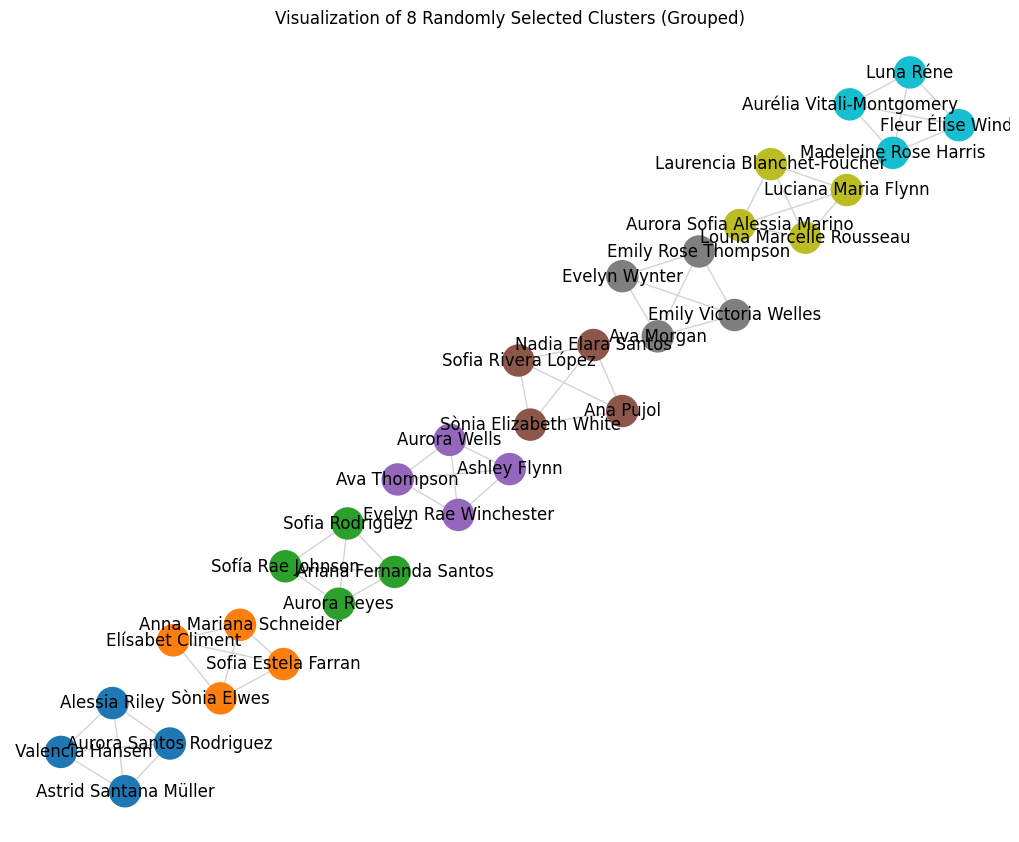

In [33]:
import random

# Visualize a subset of clusters with grouped nodes
def visualize_subset_clusters_grouped(graph, participants: List[Participant], clusters: List[set], subset_size=8):
    # Randomly select a subset of clusters
    selected_clusters = random.sample(clusters, min(subset_size, len(clusters)))

    # Generate colors for the subset
    colors = plt.cm.tab10(np.linspace(0, 1, len(selected_clusters)))

    # Create a position dictionary to ensure cluster grouping
    pos = {}
    base_layout = nx.spring_layout(graph)  # Base layout to guide overall structure

    for cluster_idx, cluster in enumerate(selected_clusters):
        cluster_graph = graph.subgraph(cluster)  # Extract the subgraph for the cluster
        cluster_layout = nx.spring_layout(cluster_graph)  # Layout for the cluster

        # Offset positions of the cluster nodes to group them
        offset = cluster_idx * 2.0  # Adjust this for more spacing between clusters
        for node, position in cluster_layout.items():
            pos[node] = position + [offset, offset]  # Add offset to cluster layout

    # Plot the selected clusters
    plt.figure(figsize=(10, 8))
    for i, cluster in enumerate(selected_clusters):
        cluster_names = [participants[node].name for node in cluster]
        nx.draw(
            graph.subgraph(cluster),
            pos=pos,
            node_color=[colors[i]] * len(cluster),
            labels={node: participants[node].name for node in cluster},
            with_labels=True,
            node_size=500,
            edge_color="lightgray"
        )
        print(f"Cluster {i+1}: {', '.join(cluster_names)}")

    plt.title(f"Visualization of {len(selected_clusters)} Randomly Selected Clusters (Grouped)")
    plt.show()

# Visualize a random subset of 8 clusters with grouping
visualize_subset_clusters_grouped(graph, participants, clusters, subset_size=8)


### Visualize Specific Clusters Based on Student Names

Cluster 1: Emma Winters, Lluís Flynn, Sara Estela García i Rossell, Sara Mas

Cluster 2: Ana Sofia Wagner, Ava Rodriguez, Aurora Valencia, Aurélie Rae Valdés

Cluster 3: Anna Svensson, Sofía Elżbieta Vazquez, Vicenta Mira, Sophie Dumont

Cluster 4: Elisabet Fontrodona, Evie Rosewood, Sònia Rose Ellis, Liam Ryder

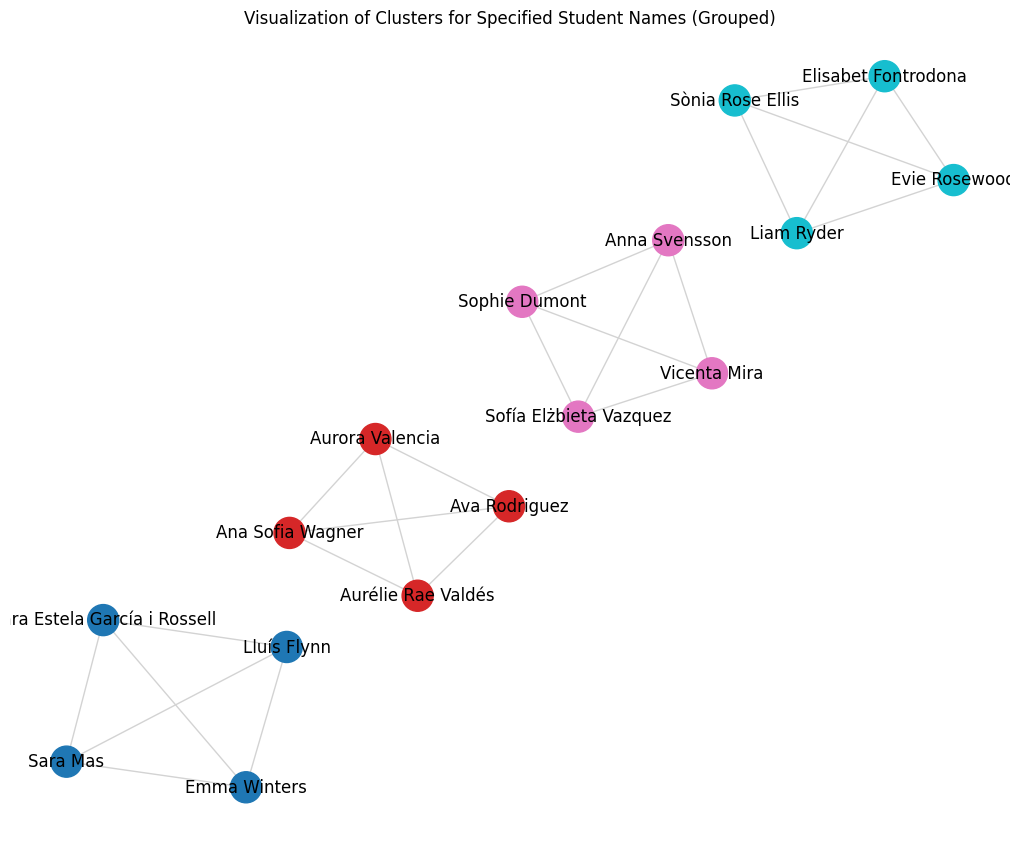

In [34]:
# Visualize clusters based on specific student names with grouped nodes
def visualize_specific_clusters_grouped(graph, participants: List[Participant], clusters: List[set], student_names: List[str]):
    # Create a mapping of participant names to their indices
    name_to_index = {participant.name: idx for idx, participant in enumerate(participants)}

    # Find the indices of the specified student names
    target_indices = [name_to_index[name] for name in student_names if name in name_to_index]
    if not target_indices:
        print("No participants found with the specified names.")
        return

    # Find clusters containing the target indices
    selected_clusters = [
        cluster for cluster in clusters if any(node in target_indices for node in cluster)
    ]

    if not selected_clusters:
        print("No clusters found containing the specified students.")
        return

    # Generate colors for the subset
    colors = plt.cm.tab10(np.linspace(0, 1, len(selected_clusters)))

    # Create a position dictionary to ensure cluster grouping
    pos = {}
    base_layout = nx.spring_layout(graph)  # Base layout to guide overall structure

    for cluster_idx, cluster in enumerate(selected_clusters):
        cluster_graph = graph.subgraph(cluster)  # Extract the subgraph for the cluster
        cluster_layout = nx.spring_layout(cluster_graph)  # Layout for the cluster

        # Offset positions of the cluster nodes to group them
        offset = cluster_idx * 2.0  # Adjust this for more spacing between clusters
        for node, position in cluster_layout.items():
            pos[node] = position + [offset, offset]  # Add offset to cluster layout

    # Plot the selected clusters
    plt.figure(figsize=(10, 8))
    for i, cluster in enumerate(selected_clusters):
        cluster_names = [participants[node].name for node in cluster]
        nx.draw(
            graph.subgraph(cluster),
            pos=pos,
            node_color=[colors[i]] * len(cluster),
            labels={node: participants[node].name for node in cluster},
            with_labels=True,
            node_size=500,
            edge_color="lightgray"
        )
        print(f"Cluster {i+1}: {', '.join(cluster_names)}")

    plt.title(f"Visualization of Clusters for Specified Student Names (Grouped)")
    plt.show()

# Example: Visualize clusters containing specific students by name with grouping
specific_student_names = ["Emma Winters", "Sophie Dumont", "Elisabet Fontrodona", "Ava Rodriguez"]
visualize_specific_clusters_grouped(graph, participants, clusters, specific_student_names)


### Display Clusters for Specific Students

In [ ]:
# Display cluster names for specific students
def visualize_cluster_names(participants: List[Participant], clusters: List[set], names: List[str]):
    # Map participant names to indices
    name_to_index = {p.name: i for i, p in enumerate(participants)}

    # Find clusters for the specified names
    selected_indices = [name_to_index[name] for name in names if name in name_to_index]
    selected_clusters = [
        cluster for cluster in clusters if any(idx in selected_indices for idx in cluster)
    ]

    for cluster in selected_clusters:
        cluster_names = [participants[idx].name for idx in cluster]
        print(f"Cluster: {', '.join(cluster_names)}")

# Example: Names of students to visualize clusters
specific_names = ["Emma Winters", "Sophie Dumont", "Elisabet Fontrodona", "Ava Rodriguez"]
visualize_cluster_names(participants, clusters, specific_names)


Cluster: Emma Winters, Lluís Flynn, Sara Estela García i Rossell, Sara Mas

Cluster: Ana Sofia Wagner, Ava Rodriguez, Aurora Valencia, Aurélie Rae Valdés

Cluster: Anna Svensson, Sofía Elżbieta Vazquez, Vicenta Mira, Sophie Dumont

Cluster: Elisabet Fontrodona, Evie Rosewood, Sònia Rose Ellis, Liam Ryder

### Display Cluster Names for Specific Student Names

In [ ]:
# Function to find and display the cluster names for specific students
def display_cluster_names_by_student_names(participants: List[Participant], clusters: List[set], student_names: List[str]):
    # Create a mapping of participant names to their indices
    name_to_index = {participant.name: idx for idx, participant in enumerate(participants)}

    # Find the indices of the specified student names
    target_indices = [name_to_index[name] for name in student_names if name in name_to_index]
    if not target_indices:
        print("No participants found with the specified names.")
        return

    # Find clusters containing the target indices
    clusters_to_display = [
        cluster for cluster in clusters if any(index in target_indices for index in cluster)
    ]

    if not clusters_to_display:
        print("No clusters found for the specified students.")
        return

    # Get the names of all students in those clusters
    cluster_names = []
    for cluster in clusters_to_display:
        cluster_names.append([participants[index].name for index in cluster])

    # Display the results
    for i, names in enumerate(cluster_names, start=1):
        print(f"Cluster {i}: {', '.join(names)}")

# Example: Names of students to display their clusters
specific_student_names = ["Emilia Windsor", "Sophie Casals-Fourcade", "Sofia Martínez García", "Alessia Caterina García"]
display_cluster_names_by_student_names(participants, clusters, specific_student_names)


Cluster 1: Sophie Casals-Fourcade, Emília Laurent Blanchard, Mercè Ellis, Avery Winston

Cluster 2: Sofia Martínez García, Alessia Lane, Aurélie Elena Langley, Luna Bianchi

Cluster 3: Evelyn Reed, Lucas Parker, Evie Mayson, Emilia Windsor

Cluster 4: Alessia Caterina García, Marion Llobell, Ava Rose Winchester, Sofia Ribas.

### Display Clustering Details

In [35]:
import random

# Function to calculate distances between participants
def calculate_distance_matrix(participants: List[Participant], weights: Dict[str, float]) -> np.ndarray:
    num_participants = len(participants)
    distance_matrix = np.zeros((num_participants, num_participants))

    for i, p1 in enumerate(participants):
        for j, p2 in enumerate(participants):
            if i != j:
                distance_matrix[i, j] = compute_distance(p1, p2, weights)

    return distance_matrix

# Function to display clustering details
def display_cluster_details(participants: List[Participant], clusters: List[set], student_names: List[str], weights: Dict[str, float]):
    # Create a mapping of participant names to their indices
    name_to_index = {participant.name: idx for idx, participant in enumerate(participants)}

    # Compute the distance matrix
    distance_matrix = calculate_distance_matrix(participants, weights)

    # Find the indices of the specified student names
    target_indices = [name_to_index[name] for name in student_names if name in name_to_index]
    if not target_indices:
        print("No participants found with the specified names.")
        return

    # Find clusters containing the target indices
    clusters_to_display = [
        cluster for cluster in clusters if any(index in target_indices for index in cluster)
    ]

    if not clusters_to_display:
        print("No clusters found for the specified students.")
        return

    for i, cluster in enumerate(clusters_to_display, start=1):
        print(f"\nCluster {i}:")
        cluster_names = [participants[index].name for index in cluster]
        print(f"Students in cluster: {', '.join(cluster_names)}")

        print("\nPairwise distances within the cluster:")
        for index1 in cluster:
            for index2 in cluster:
                if index1 != index2:
                    print(
                        f"Distance between {participants[index1].name} and {participants[index2].name}: "
                        f"{distance_matrix[index1, index2]:.2f}"
                    )

        # Compare distances to a random student in another cluster
        other_clusters = [c for c in clusters if c != cluster]
        if other_clusters:
            random_other_cluster = random.choice(other_clusters)
            random_other_student = random.choice(list(random_other_cluster))
            for index in cluster:
                print(
                    f"Distance between {participants[index].name} "
                    f"and {participants[random_other_student].name} (from another cluster): "
                    f"{distance_matrix[index, random_other_student]:.2f}"
                )

# Example: Names of students to display their clusters
specific_student_names = ["Emma Winters", "Sophie Dumont", "Elisabet Fontrodona", "Ava Rodriguez"]
display_cluster_details(participants, clusters, specific_student_names, attribute_weights)


Cluster 1:

Students in cluster: Emma Winters, Lluís Flynn, Sara Estela García i Rossell, Sara Mas

Pairwise distances within the cluster:

Distance between Emma Winters and Lluís Flynn: 2.70

Distance between Emma Winters and Sara Estela García i Rossell: 2.64

Distance between Emma Winters and Sara Mas: 2.19

Distance between Lluís Flynn and Emma Winters: 2.70

Distance between Lluís Flynn and Sara Estela García i Rossell: 2.05

Distance between Lluís Flynn and Sara Mas: 2.22

Distance between Sara Estela García i Rossell and Emma Winters: 2.64

Distance between Sara Estela García i Rossell and Lluís Flynn: 2.05

Distance between Sara Estela García i Rossell and Sara Mas: 2.68

Distance between Sara Mas and Emma Winters: 2.19

Distance between Sara Mas and Lluís Flynn: 2.22

Distance between Sara Mas and Sara Estela García i Rossell: 2.68

Distance between Emma Winters and Ana Lucía Rodríguez Martínez (from another cluster): 4.15

Distance between Lluís Flynn and Ana Lucía Rodríguez Martínez (from another cluster): 3.65

Distance between Sara Estela García i Rossell and Ana Lucía Rodríguez Martínez (from another cluster): 3.19

Distance between Sara Mas and Ana Lucía Rodríguez Martínez (from another cluster): 4.17

Cluster 2:

Students in cluster: Ana Sofia Wagner, Ava Rodriguez, Aurora Valencia, Aurélie Rae Valdés

Pairwise distances within the cluster:

Distance between Ana Sofia Wagner and Ava Rodriguez: 2.45

Distance between Ana Sofia Wagner and Aurora Valencia: 2.88

Distance between Ana Sofia Wagner and Aurélie Rae Valdés: 2.21

Distance between Ava Rodriguez and Ana Sofia Wagner: 2.45

Distance between Ava Rodriguez and Aurora Valencia: 1.91

Distance between Ava Rodriguez and Aurélie Rae Valdés: 2.90

Distance between Aurora Valencia and Ana Sofia Wagner: 2.88

Distance between Aurora Valencia and Ava Rodriguez: 1.91

Distance between Aurora Valencia and Aurélie Rae Valdés: 3.29

Distance between Aurélie Rae Valdés and Ana Sofia Wagner: 2.21

Distance between Aurélie Rae Valdés and Ava Rodriguez: 2.90

Distance between Aurélie Rae Valdés and Aurora Valencia: 3.29

Distance between Ana Sofia Wagner and Ariel Alejandra Hernández (from another cluster): 6.05

Distance between Ava Rodriguez and Ariel Alejandra Hernández (from another cluster): 5.49

Distance between Aurora Valencia and Ariel Alejandra Hernández (from another cluster): 5.22

Distance between Aurélie Rae Valdés and Ariel Alejandra Hernández (from another cluster): 6.24

Cluster 3:

Students in cluster: Anna Svensson, Sofía Elżbieta Vazquez, Vicenta Mira, Sophie Dumont

Pairwise distances within the cluster:

Distance between Anna Svensson and Sofía Elżbieta Vazquez: 2.94

Distance between Anna Svensson and Vicenta Mira: 2.61

Distance between Anna Svensson and Sophie Dumont: 2.77

Distance between Sofía Elżbieta Vazquez and Anna Svensson: 2.94

Distance between Sofía Elżbieta Vazquez and Vicenta Mira: 4.12

Distance between Sofía Elżbieta Vazquez and Sophie Dumont: 3.62

Distance between Vicenta Mira and Anna Svensson: 2.61

Distance between Vicenta Mira and Sofía Elżbieta Vazquez: 4.12

Distance between Vicenta Mira and Sophie Dumont: 3.56

Distance between Sophie Dumont and Anna Svensson: 2.77

Distance between Sophie Dumont and Sofía Elżbieta Vazquez: 3.62

Distance between Sophie Dumont and Vicenta Mira: 3.56

Distance between Anna Svensson and Rylan Flynn Jameson (from another cluster): 3.99

Distance between Sofía Elżbieta Vazquez and Rylan Flynn Jameson (from another cluster): 3.68

Distance between Vicenta Mira and Rylan Flynn Jameson (from another cluster): 4.25

Distance between Sophie Dumont and Rylan Flynn Jameson (from another cluster): 4.80

Cluster 4:

Students in cluster: Elisabet Fontrodona, Evie Rosewood, Sònia Rose Ellis, Liam Ryder

Pairwise distances within the cluster:

Distance between Elisabet Fontrodona and Evie Rosewood: 3.19

Distance between Elisabet Fontrodona and Sònia Rose Ellis: 2.40

Distance between Elisabet Fontrodona and Liam Ryder: 2.87

Distance between Evie Rosewood and Elisabet Fontrodona: 3.19

Distance between Evie Rosewood and Sònia Rose Ellis: 2.20

Distance between Evie Rosewood and Liam Ryder: 1.88

Distance between Sònia Rose Ellis and Elisabet Fontrodona: 2.40

Distance between Sònia Rose Ellis and Evie Rosewood: 2.20

Distance between Sònia Rose Ellis and Liam Ryder: 1.89

Distance between Liam Ryder and Elisabet Fontrodona: 2.87

Distance between Liam Ryder and Evie Rosewood: 1.88

Distance between Liam Ryder and Sònia Rose Ellis: 1.89

Distance between Elisabet Fontrodona and Luiza Figueira García (from another cluster): 5.42

Distance between Evie Rosewood and Luiza Figueira García (from another cluster): 4.27

Distance between Sònia Rose Ellis and Luiza Figueira García (from another cluster): 4.52

Distance between Liam Ryder and Luiza Figueira García (from another cluster): 4.48

### Box-Plot

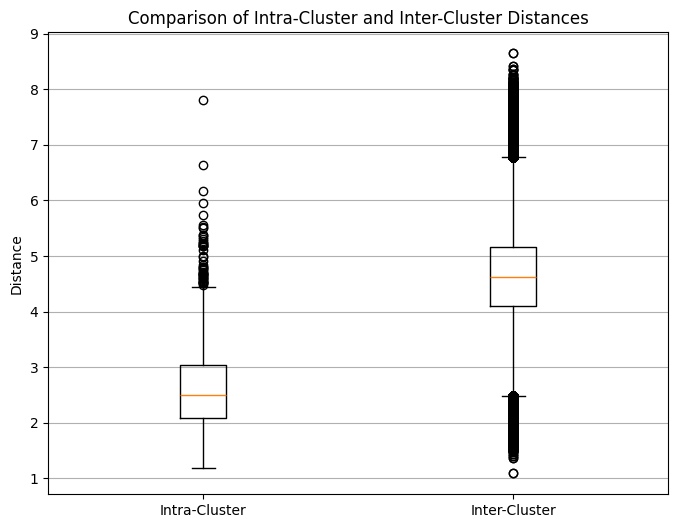

In [36]:
import matplotlib.pyplot as plt

# Visualize intra-cluster and inter-cluster distances using a box plot
def visualize_distances_boxplot(participants: List[Participant], clusters: List[set], weights: Dict[str, float]):
    # Compute the distance matrix
    distance_matrix = calculate_distance_matrix(participants, weights)

    # Separate intra-cluster and inter-cluster distances
    intra_cluster_distances = []
    inter_cluster_distances = []

    for cluster in clusters:
        cluster = list(cluster)
        for i in range(len(cluster)):
            for j in range(i + 1, len(cluster)):
                # Intra-cluster distance
                intra_cluster_distances.append(distance_matrix[cluster[i], cluster[j]])

        # Inter-cluster distances
        other_clusters = [c for c in clusters if c != set(cluster)]
        for index in cluster:
            for other_cluster in other_clusters:
                for other_index in other_cluster:
                    inter_cluster_distances.append(distance_matrix[index, other_index])

    # Prepare data for visualization
    data = [intra_cluster_distances, inter_cluster_distances]
    labels = ['Intra-Cluster', 'Inter-Cluster']

    # Create box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(data, labels=labels)
    plt.title('Comparison of Intra-Cluster and Inter-Cluster Distances')
    plt.ylabel('Distance')
    plt.grid(axis='y')
    plt.show()

# Example usage:
visualize_distances_boxplot(participants, clusters, attribute_weights)


### Violin Plot

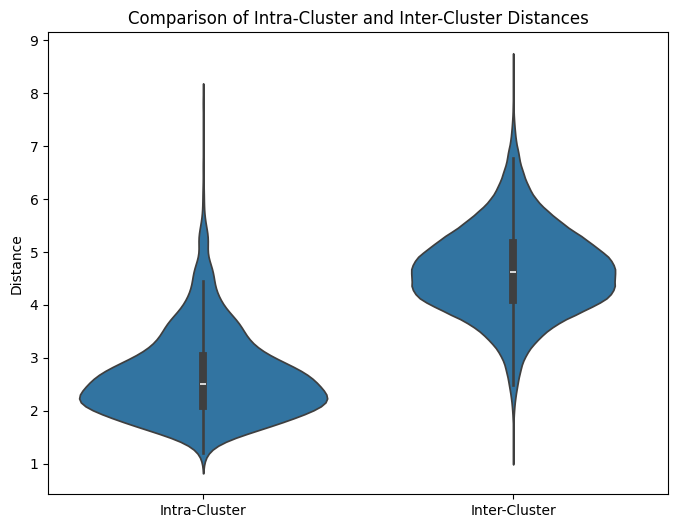

In [37]:
import seaborn as sns

# Visualize intra-cluster and inter-cluster distances using a violin plot
def visualize_distances_violinplot(participants: List[Participant], clusters: List[set], weights: Dict[str, float]):
    # Compute the distance matrix
    distance_matrix = calculate_distance_matrix(participants, weights)

    # Separate intra-cluster and inter-cluster distances
    intra_cluster_distances = []
    inter_cluster_distances = []

    for cluster in clusters:
        cluster = list(cluster)
        for i in range(len(cluster)):
            for j in range(i + 1, len(cluster)):
                # Intra-cluster distance
                intra_cluster_distances.append(distance_matrix[cluster[i], cluster[j]])

        # Inter-cluster distances
        other_clusters = [c for c in clusters if c != set(cluster)]
        for index in cluster:
            for other_cluster in other_clusters:
                for other_index in other_cluster:
                    inter_cluster_distances.append(distance_matrix[index, other_index])

    # Prepare data for visualization
    distances = intra_cluster_distances + inter_cluster_distances
    labels = ['Intra-Cluster'] * len(intra_cluster_distances) + ['Inter-Cluster'] * len(inter_cluster_distances)

    # Create violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=labels, y=distances)
    plt.title('Comparison of Intra-Cluster and Inter-Cluster Distances')
    plt.ylabel('Distance')
    plt.show()

# Example usage:
visualize_distances_violinplot(participants, clusters, attribute_weights)


## Project Definition with Dictionary Attributes with Text Attributes (with Weighted Attributes)

### Imports

In [38]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from rich import print
from typing import List, Dict
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cosine
from sentence_transformers import SentenceTransformer, util

# Load SentenceTransformer model for semantic similarity
model = SentenceTransformer('all-MiniLM-L6-v2')

# Helper function to normalize values to [0, 1]
def normalize(values, min_val=None, max_val=None):
    values = np.array(values, dtype=float)
    min_val = min_val if min_val is not None else values.min()
    max_val = max_val if max_val is not None else values.max()
    return (values - min_val) / (max_val - min_val)

# Mapping for categorical attributes
YEAR_MAPPING = {
    "1st year": 0.0, "2nd year": 0.2, "3rd year": 0.4,
    "4th year": 0.6, "Masters": 0.8, "PhD": 1.0
}
EXPERIENCE_MAPPING = {"Beginner": 0.0, "Intermediate": 0.5, "Advanced": 1.0}

# Jaccard distance function
def jaccard_distance(set1: set, set2: set) -> float:
    if not set1 and not set2:
        return 0.0
    return 1 - len(set1 & set2) / len(set1 | set2)

# Hamming distance for availability
def hamming_distance(dict1: Dict[str, bool], dict2: Dict[str, bool]) -> float:
    mismatches = sum(dict1[key] != dict2[key] for key in dict1 if key in dict2)
    return mismatches / len(dict1)

# Map free-form text to predefined labels using SentenceTransformer
def map_objective_to_label(objective_text: str, predefined_labels: List[str]) -> str:
    embeddings1 = model.encode(objective_text, convert_to_tensor=True)
    embeddings2 = model.encode(predefined_labels, convert_to_tensor=True)
    similarities = util.cos_sim(embeddings1, embeddings2).squeeze()
    best_match_index = np.argmax(similarities)
    return predefined_labels[best_match_index]


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Load and Preprocess Participants

In [39]:
import json
import uuid
from dataclasses import dataclass
from typing import Dict, List, Literal

# Define Participant class
@dataclass
class Participant:
    id: uuid.UUID  # Unique identifier

    # Personal data
    name: str
    email: str
    age: int
    year_of_study: Literal["1st year", "2nd year", "3rd year", "4th year", "Masters", "PhD"]
    shirt_size: Literal["S", "M", "L", "XL"]
    university: str
    dietary_restrictions: Literal["None", "Vegetarian", "Vegan", "Gluten-free", "Other"]

    # Experience and programming skills
    programming_skills: Dict[str, int]
    experience_level: Literal["Beginner", "Intermediate", "Advanced"]
    hackathons_done: int

    # Interests, preferences and constraints
    interests: List[str]
    preferred_role: Literal[
        "Analysis", "Visualization", "Development", "Design", "Don't know", "Don't care"
    ]
    objective: str  # To be mapped to "win", "experience", "learn", "meet"
    interest_in_challenges: List[str]
    preferred_languages: List[str]
    friend_registration: List[uuid.UUID]
    preferred_team_size: int
    availability: Dict[str, bool]

    # Description of the participant
    introduction: str
    technical_project: str
    future_excitement: str
    fun_fact: str

# Align programming skills
def align_programming_skills(participants: List[Participant]) -> None:
    all_skills = set()
    for participant in participants:
        all_skills.update(participant.programming_skills.keys())

    for participant in participants:
        for skill in all_skills:
            participant.programming_skills.setdefault(skill, 0)

# Load participants data
def load_participants(path: str) -> List[Participant]:
    with open(path, 'r') as file:
        return [Participant(**participant) for participant in json.load(file)]

# Normalize and map participant attributes
def preprocess_participants(participants: List[Participant], predefined_objectives: List[str]) -> List[Participant]:
    align_programming_skills(participants)  # Align programming skills across participants
    for participant in participants:
        # Normalize numerical attributes
        participant.age = normalize([participant.age], min_val=17, max_val=27)[0]
        participant.hackathons_done = normalize([participant.hackathons_done], min_val=0, max_val=9)[0]
        participant.preferred_team_size = normalize([participant.preferred_team_size], min_val=0, max_val=4)[0]

        # Map categorical attributes
        participant.year_of_study = YEAR_MAPPING[participant.year_of_study]
        participant.experience_level = EXPERIENCE_MAPPING[participant.experience_level]

        # Map objective using NLP
        participant.objective = map_objective_to_label(participant.objective, predefined_objectives)

    return participants

# Load and preprocess participants
data_path = "datathon_participants.json"
predefined_objectives = ["win", "experience", "learn", "meet"]
participants = load_participants(data_path)
participants = preprocess_participants(participants, predefined_objectives)

print(f"Preprocessed {len(participants)} participants.")


Preprocessed 924 participants.

### Compute Weighted Distance

In [40]:
# Compute weighted distance between two participants
def compute_distance(p1: Participant, p2: Participant, weights: Dict[str, float]) -> float:
    distance = 0

    # Continuous attributes with weights
    distance += weights['age'] * abs(p1.age - p2.age)
    distance += weights['hackathons_done'] * abs(p1.hackathons_done - p2.hackathons_done)
    distance += weights['preferred_team_size'] * abs(p1.preferred_team_size - p2.preferred_team_size)
    distance += weights['year_of_study'] * abs(p1.year_of_study - p2.year_of_study)

    # Categorical attributes with weights
    distance += weights['university'] * (0 if p1.university == p2.university else 1)
    distance += weights['dietary_restrictions'] * (0 if p1.dietary_restrictions == p2.dietary_restrictions else 1)
    distance += weights['experience_level'] * abs(p1.experience_level - p2.experience_level)
    distance += weights['preferred_role'] * (0 if p1.preferred_role == p2.preferred_role else 1)
    distance += weights['objective'] * (0 if p1.objective == p2.objective else 1)

    # Additional attributes with weights
    distance += weights['programming_skills'] * cosine(
        list(p1.programming_skills.values()), list(p2.programming_skills.values())
    )
    distance += weights['interests'] * jaccard_distance(set(p1.interests), set(p2.interests))
    distance += weights['interest_in_challenges'] * jaccard_distance(
        set(p1.interest_in_challenges), set(p2.interest_in_challenges)
    )
    distance += weights['preferred_languages'] * jaccard_distance(
        set(p1.preferred_languages), set(p2.preferred_languages)
    )
    distance += weights['friend_registration'] * (
        0 if set(p1.friend_registration) & set(p2.friend_registration) else 1
    )
    distance += weights['availability'] * hamming_distance(p1.availability, p2.availability)

    return distance


### Construct Graph

In [41]:
# Construct a similarity graph with weighted distances
def construct_graph(participants: List[Participant], weights: Dict[str, float]) -> nx.Graph:
    graph = nx.Graph()
    for i, p1 in enumerate(participants):
        graph.add_node(i, participant=p1)  # Add participant as a node
        for j, p2 in enumerate(participants):
            if i < j:  # Avoid duplicate computations
                distance = compute_distance(p1, p2, weights)
                graph.add_edge(i, j, weight=distance)
    return graph

# Define weights for attributes
attribute_weights = {
    'age': 1.0,
    'year_of_study': 0.8,
    'university': 1.2,
    'dietary_restrictions': 0.5,
    'experience_level': 1.0,
    'hackathons_done': 0.7,
    'preferred_role': 0.6,
    'preferred_team_size': 0.9,
    'programming_skills': 0.8,
    'interests': 0.9,
    'interest_in_challenges': 0.8,
    'preferred_languages': 0.7,
    'friend_registration': 0.5,
    'availability': 0.6,
    'objective': 1.0
}

graph = construct_graph(participants, attribute_weights)
print(f"Graph constructed with {len(graph.nodes)} nodes.")


Graph constructed with 924 nodes.

### Compute Distance Matrix and Form Clusters

In [42]:
# Form Clusters based on distances using a Greedy approach
def calculate_distance_matrix(participants: List[Participant], weights: Dict[str, float]) -> np.ndarray:
    num_participants = len(participants)
    distance_matrix = np.zeros((num_participants, num_participants))

    for i, p1 in enumerate(participants):
        for j, p2 in enumerate(participants):
            if i != j:
                distance_matrix[i, j] = compute_distance(p1, p2, weights)

    return distance_matrix

def form_clusters_with_distances(distance_matrix: np.ndarray, max_size=4) -> List[set]:
    num_students = len(distance_matrix)
    unvisited = set(range(num_students))
    clusters = []

    while unvisited:
        # Start a new cluster
        cluster = set()
        # Pick a random starting student
        current_student = unvisited.pop()
        cluster.add(current_student)

        # Add students to the cluster based on minimum distance
        while len(cluster) < max_size and unvisited:
            # Find the closest student to the current cluster
            closest_student = min(
                unvisited,
                key=lambda s: min(distance_matrix[s][c] for c in cluster),
            )
            cluster.add(closest_student)
            unvisited.remove(closest_student)

        clusters.append(cluster)

    return clusters

# Compute the distance matrix
distance_matrix = calculate_distance_matrix(participants, attribute_weights)

# Form clusters using distances
clusters = form_clusters_with_distances(distance_matrix, max_size=4)

print(f"Formed {len(clusters)} clusters based on weighted distances.")


Formed 231 clusters based on weighted distances.

### Visualize Random Subset of Clusters

Cluster 1: Lily Victoria Russell, Sol Llorens., Mariona Elena White, Emily Anne Taylor

Cluster 2: Alessandra Pérez Oliveira, Ava Elena Rodriguez, Àngels Waverley, Lluïsa Annabelle Flores

Cluster 3: Sofia Ellis Rivera, Sofia Rodriguez, Ariana Fernanda Santos, Sofía Rae Johnson

Cluster 4: Sofía Evelyn Foster, Sofía Anne Kramer, Lara Margarita Esteller, Maya Alexis Warner

Cluster 5: Evelyn Paige Thompson, Evie Rosewood, Alessia Harrison, Evelyn Fiorella

Cluster 6: Emma Winters, Pilar Cristina Fletcher, Sònia Elwes, Sara Mas

Cluster 7: Sofía Isabel López Flores, Ana Lisa Rodriguez, Alexandra García, Sofia García

Cluster 8: Ava Winters, Sònia Español, Evelyn Winters, Evelyn Rose Winters

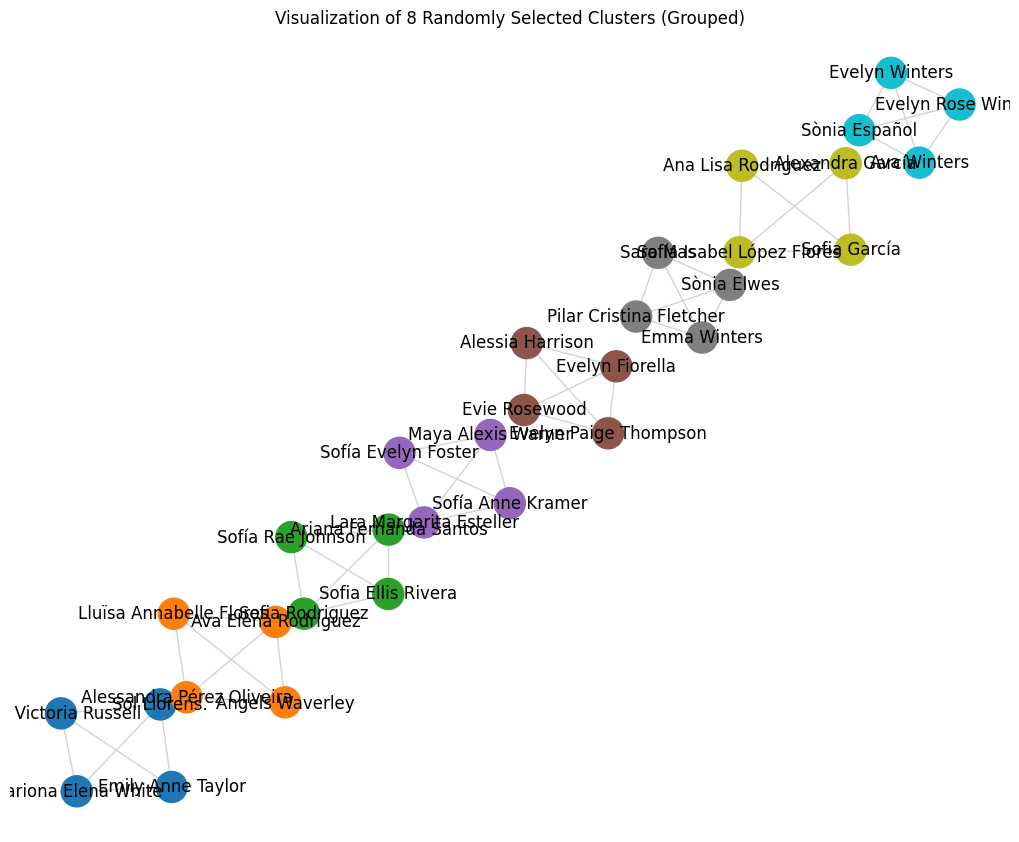

In [43]:
import random

# Visualize a subset of clusters with grouped nodes
def visualize_subset_clusters_grouped(graph, participants: List[Participant], clusters: List[set], subset_size=8):
    # Randomly select a subset of clusters
    selected_clusters = random.sample(clusters, min(subset_size, len(clusters)))

    # Generate colors for the subset
    colors = plt.cm.tab10(np.linspace(0, 1, len(selected_clusters)))

    # Create a position dictionary to ensure cluster grouping
    pos = {}
    base_layout = nx.spring_layout(graph)  # Base layout to guide overall structure

    for cluster_idx, cluster in enumerate(selected_clusters):
        cluster_graph = graph.subgraph(cluster)  # Extract the subgraph for the cluster
        cluster_layout = nx.spring_layout(cluster_graph)  # Layout for the cluster

        # Offset positions of the cluster nodes to group them
        offset = cluster_idx * 2.0  # Adjust this for more spacing between clusters
        for node, position in cluster_layout.items():
            pos[node] = position + [offset, offset]  # Add offset to cluster layout

    # Plot the selected clusters
    plt.figure(figsize=(10, 8))
    for i, cluster in enumerate(selected_clusters):
        cluster_names = [participants[node].name for node in cluster]
        nx.draw(
            graph.subgraph(cluster),
            pos=pos,
            node_color=[colors[i]] * len(cluster),
            labels={node: participants[node].name for node in cluster},
            with_labels=True,
            node_size=500,
            edge_color="lightgray"
        )
        print(f"Cluster {i+1}: {', '.join(cluster_names)}")

    plt.title(f"Visualization of {len(selected_clusters)} Randomly Selected Clusters (Grouped)")
    plt.show()

# Visualize a random subset of 8 clusters with grouping
visualize_subset_clusters_grouped(graph, participants, clusters, subset_size=8)


### Visualize Specific Clusters

Cluster 1: Emma Winters, Pilar Cristina Fletcher, Sònia Elwes, Sara Mas

Cluster 2: Alejandra Pérez, Elisabet Fontrodona, Sophia Elif Langstroth, Luisa Schneider

Cluster 3: Aida Santiago, Ava Rodriguez, Alejandra Nicole Elliott, Lena Sophia Meyer

Cluster 4: Sophia Kalyani, Emily Jenson, Aurélien Dubois, Sophie Dumont

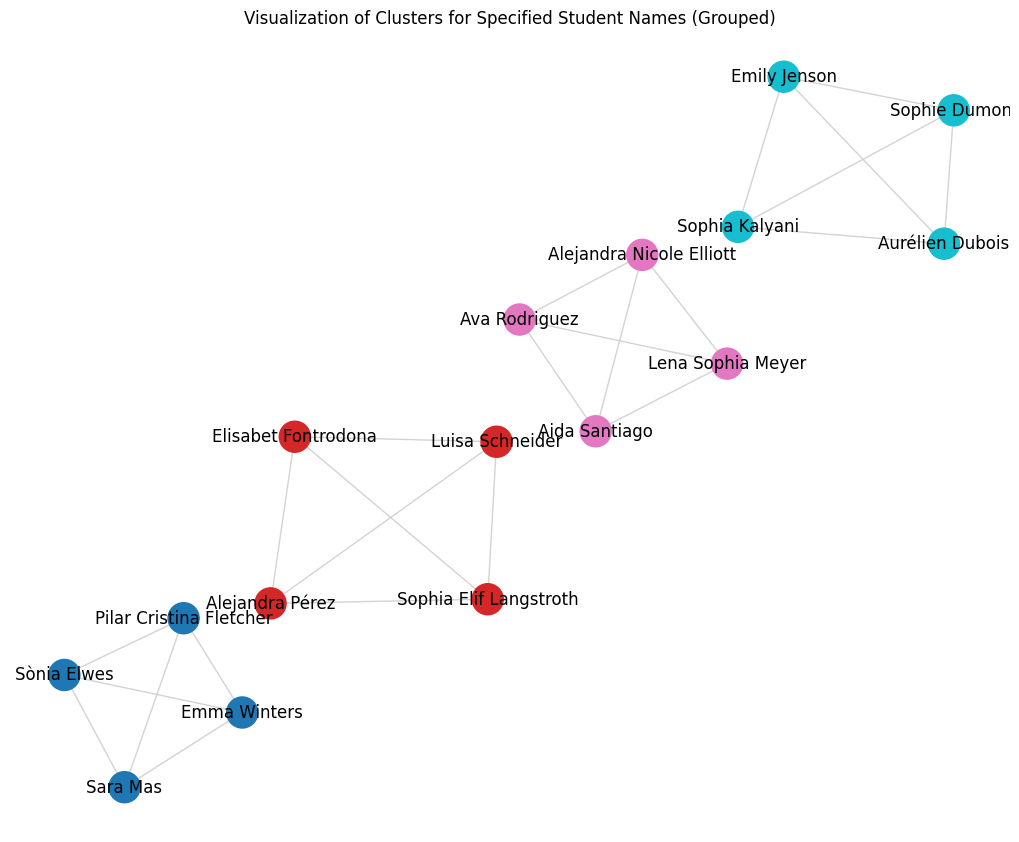

In [44]:
# Visualize clusters based on specific student names with grouped nodes
def visualize_specific_clusters_grouped(graph, participants: List[Participant], clusters: List[set], student_names: List[str]):
    # Create a mapping of participant names to their indices
    name_to_index = {participant.name: idx for idx, participant in enumerate(participants)}

    # Find the indices of the specified student names
    target_indices = [name_to_index[name] for name in student_names if name in name_to_index]
    if not target_indices:
        print("No participants found with the specified names.")
        return

    # Find clusters containing the target indices
    selected_clusters = [
        cluster for cluster in clusters if any(node in target_indices for node in cluster)
    ]

    if not selected_clusters:
        print("No clusters found containing the specified students.")
        return

    # Generate colors for the subset
    colors = plt.cm.tab10(np.linspace(0, 1, len(selected_clusters)))

    # Create a position dictionary to ensure cluster grouping
    pos = {}
    base_layout = nx.spring_layout(graph)  # Base layout to guide overall structure

    for cluster_idx, cluster in enumerate(selected_clusters):
        cluster_graph = graph.subgraph(cluster)  # Extract the subgraph for the cluster
        cluster_layout = nx.spring_layout(cluster_graph)  # Layout for the cluster

        # Offset positions of the cluster nodes to group them
        offset = cluster_idx * 2.0  # Adjust this for more spacing between clusters
        for node, position in cluster_layout.items():
            pos[node] = position + [offset, offset]  # Add offset to cluster layout

    # Plot the selected clusters
    plt.figure(figsize=(10, 8))
    for i, cluster in enumerate(selected_clusters):
        cluster_names = [participants[node].name for node in cluster]
        nx.draw(
            graph.subgraph(cluster),
            pos=pos,
            node_color=[colors[i]] * len(cluster),
            labels={node: participants[node].name for node in cluster},
            with_labels=True,
            node_size=500,
            edge_color="lightgray"
        )
        print(f"Cluster {i+1}: {', '.join(cluster_names)}")

    plt.title(f"Visualization of Clusters for Specified Student Names (Grouped)")
    plt.show()

# Example: Visualize clusters containing specific students by name with grouping
specific_student_names = ["Emma Winters", "Sophie Dumont", "Elisabet Fontrodona", "Ava Rodriguez"]
visualize_specific_clusters_grouped(graph, participants, clusters, specific_student_names)


### Display Cluster Names

In [45]:
# Display cluster names for specific students
def visualize_cluster_names(participants: List[Participant], clusters: List[set], names: List[str]):
    # Map participant names to indices
    name_to_index = {p.name: i for i, p in enumerate(participants)}

    # Find clusters for the specified names
    selected_indices = [name_to_index[name] for name in names if name in name_to_index]
    selected_clusters = [
        cluster for cluster in clusters if any(idx in selected_indices for idx in cluster)
    ]

    for cluster in selected_clusters:
        cluster_names = [participants[idx].name for idx in cluster]
        print(f"Cluster: {', '.join(cluster_names)}")

# Example: Names of students to visualize clusters
specific_names = ["Emma Winters", "Sophie Dumont", "Elisabet Fontrodona", "Ava Rodriguez"]
visualize_cluster_names(participants, clusters, specific_names)


Cluster: Emma Winters, Pilar Cristina Fletcher, Sònia Elwes, Sara Mas

Cluster: Alejandra Pérez, Elisabet Fontrodona, Sophia Elif Langstroth, Luisa Schneider

Cluster: Aida Santiago, Ava Rodriguez, Alejandra Nicole Elliott, Lena Sophia Meyer

Cluster: Sophia Kalyani, Emily Jenson, Aurélien Dubois, Sophie Dumont

### Display Clusters for Specific Students

In [46]:
# Function to find and display the cluster names for specific students
def display_cluster_names_by_student_names(participants: List[Participant], clusters: List[set], student_names: List[str]):
    # Create a mapping of participant names to their indices
    name_to_index = {participant.name: idx for idx, participant in enumerate(participants)}

    # Find the indices of the specified student names
    target_indices = [name_to_index[name] for name in student_names if name in name_to_index]
    if not target_indices:
        print("No participants found with the specified names.")
        return

    # Find clusters containing the target indices
    clusters_to_display = [
        cluster for cluster in clusters if any(index in target_indices for index in cluster)
    ]

    if not clusters_to_display:
        print("No clusters found for the specified students.")
        return

    # Get the names of all students in those clusters
    cluster_names = []
    for cluster in clusters_to_display:
        cluster_names.append([participants[index].name for index in cluster])

    # Display the results
    for i, names in enumerate(cluster_names, start=1):
        print(f"Cluster {i}: {', '.join(names)}")

# Example: Names of students to display their clusters
specific_student_names = ["Emilia Windsor", "Sophie Casals-Fourcade", "Sofia Martínez García", "Alessia Caterina García"]
display_cluster_names_by_student_names(participants, clusters, specific_student_names)


Cluster 1: Sofia García Rodriguez, Gisella Ricciardo, Lena Fèvre Canaleta, Emilia Windsor

Cluster 2: Sophie Casals-Fourcade, Sacha Dupont, I'd be happy to! My name is Alejandra Torres., Madeleine Élisabeth
Dujardin

Cluster 3: Beatriz Emerson, Alessia Caterina García, Nina Hartmann, Elena Fiorentina Muntadas

Cluster 4: Sofia Martínez García, Laurencia Blanchet-Foucher, María Sofía García, Aurora Sofia Alessia Marino

### Display Cluster Details

In [48]:
import random

# Function to display clustering details
def display_cluster_details(participants: List[Participant], clusters: List[set], student_names: List[str], weights: Dict[str, float]):
    # Create a mapping of participant names to their indices
    name_to_index = {participant.name: idx for idx, participant in enumerate(participants)}

    # Compute the distance matrix
    distance_matrix = calculate_distance_matrix(participants, weights)

    # Find the indices of the specified student names
    target_indices = [name_to_index[name] for name in student_names if name in name_to_index]
    if not target_indices:
        print("No participants found with the specified names.")
        return

    # Find clusters containing the target indices
    clusters_to_display = [
        cluster for cluster in clusters if any(index in target_indices for index in cluster)
    ]

    if not clusters_to_display:
        print("No clusters found for the specified students.")
        return

    for i, cluster in enumerate(clusters_to_display, start=1):
        print(f"\nCluster {i}:")
        cluster_names = [participants[index].name for index in cluster]
        print(f"Students in cluster: {', '.join(cluster_names)}")

        print("\nPairwise distances within the cluster:")
        for index1 in cluster:
            for index2 in cluster:
                if index1 != index2:
                    print(
                        f"Distance between {participants[index1].name} and {participants[index2].name}: "
                        f"{distance_matrix[index1, index2]:.2f}"
                    )

        # Compare distances to a random student in another cluster
        other_clusters = [c for c in clusters if c != cluster]
        if other_clusters:
            random_other_cluster = random.choice(other_clusters)
            random_other_student = random.choice(list(random_other_cluster))
            for index in cluster:
                print(
                    f"Distance between {participants[index].name} "
                    f"and {participants[random_other_student].name} (from another cluster): "
                    f"{distance_matrix[index, random_other_student]:.2f}"
                )

# Example: Names of students to display their clusters
specific_student_names = ["Emma Winters", "Sophie Dumont", "Elisabet Fontrodona", "Ava Rodriguez"]
display_cluster_details(participants, clusters, specific_student_names, attribute_weights)


Cluster 1:

Students in cluster: Emma Winters, Pilar Cristina Fletcher, Sònia Elwes, Sara Mas

Pairwise distances within the cluster:

Distance between Emma Winters and Pilar Cristina Fletcher: 4.51

Distance between Emma Winters and Sònia Elwes: 4.39

Distance between Emma Winters and Sara Mas: 3.19

Distance between Pilar Cristina Fletcher and Emma Winters: 4.51

Distance between Pilar Cristina Fletcher and Sònia Elwes: 4.23

Distance between Pilar Cristina Fletcher and Sara Mas: 2.80

Distance between Sònia Elwes and Emma Winters: 4.39

Distance between Sònia Elwes and Pilar Cristina Fletcher: 4.23

Distance between Sònia Elwes and Sara Mas: 2.85

Distance between Sara Mas and Emma Winters: 3.19

Distance between Sara Mas and Pilar Cristina Fletcher: 2.80

Distance between Sara Mas and Sònia Elwes: 2.85

Distance between Emma Winters and Luna Alexandra Roca. (from another cluster): 5.43

Distance between Pilar Cristina Fletcher and Luna Alexandra Roca. (from another cluster): 5.90

Distance between Sònia Elwes and Luna Alexandra Roca. (from another cluster): 5.64

Distance between Sara Mas and Luna Alexandra Roca. (from another cluster): 5.36

Cluster 2:

Students in cluster: Alejandra Pérez, Elisabet Fontrodona, Sophia Elif Langstroth, Luisa Schneider

Pairwise distances within the cluster:

Distance between Alejandra Pérez and Elisabet Fontrodona: 2.17

Distance between Alejandra Pérez and Sophia Elif Langstroth: 2.32

Distance between Alejandra Pérez and Luisa Schneider: 2.40

Distance between Elisabet Fontrodona and Alejandra Pérez: 2.17

Distance between Elisabet Fontrodona and Sophia Elif Langstroth: 2.87

Distance between Elisabet Fontrodona and Luisa Schneider: 2.91

Distance between Sophia Elif Langstroth and Alejandra Pérez: 2.32

Distance between Sophia Elif Langstroth and Elisabet Fontrodona: 2.87

Distance between Sophia Elif Langstroth and Luisa Schneider: 2.63

Distance between Luisa Schneider and Alejandra Pérez: 2.40

Distance between Luisa Schneider and Elisabet Fontrodona: 2.91

Distance between Luisa Schneider and Sophia Elif Langstroth: 2.63

Distance between Alejandra Pérez and Anna Costa (from another cluster): 5.20

Distance between Elisabet Fontrodona and Anna Costa (from another cluster): 6.11

Distance between Sophia Elif Langstroth and Anna Costa (from another cluster): 6.19

Distance between Luisa Schneider and Anna Costa (from another cluster): 5.07

Cluster 3:

Students in cluster: Aida Santiago, Ava Rodriguez, Alejandra Nicole Elliott, Lena Sophia Meyer

Pairwise distances within the cluster:

Distance between Aida Santiago and Ava Rodriguez: 2.56

Distance between Aida Santiago and Alejandra Nicole Elliott: 2.58

Distance between Aida Santiago and Lena Sophia Meyer: 2.96

Distance between Ava Rodriguez and Aida Santiago: 2.56

Distance between Ava Rodriguez and Alejandra Nicole Elliott: 3.53

Distance between Ava Rodriguez and Lena Sophia Meyer: 3.14

Distance between Alejandra Nicole Elliott and Aida Santiago: 2.58

Distance between Alejandra Nicole Elliott and Ava Rodriguez: 3.53

Distance between Alejandra Nicole Elliott and Lena Sophia Meyer: 2.54

Distance between Lena Sophia Meyer and Aida Santiago: 2.96

Distance between Lena Sophia Meyer and Ava Rodriguez: 3.14

Distance between Lena Sophia Meyer and Alejandra Nicole Elliott: 2.54

Distance between Aida Santiago and Mercè Elena Thompson (from another cluster): 6.64

Distance between Ava Rodriguez and Mercè Elena Thompson (from another cluster): 6.75

Distance between Alejandra Nicole Elliott and Mercè Elena Thompson (from another cluster): 6.68

Distance between Lena Sophia Meyer and Mercè Elena Thompson (from another cluster): 6.10

Cluster 4:

Students in cluster: Sophia Kalyani, Emily Jenson, Aurélien Dubois, Sophie Dumont

Pairwise distances within the cluster:

Distance between Sophia Kalyani and Emily Jenson: 2.50

Distance between Sophia Kalyani and Aurélien Dubois: 2.29

Distance between Sophia Kalyani and Sophie Dumont: 3.27

Distance between Emily Jenson and Sophia Kalyani: 2.50

Distance between Emily Jenson and Aurélien Dubois: 3.07

Distance between Emily Jenson and Sophie Dumont: 3.73

Distance between Aurélien Dubois and Sophia Kalyani: 2.29

Distance between Aurélien Dubois and Emily Jenson: 3.07

Distance between Aurélien Dubois and Sophie Dumont: 3.80

Distance between Sophie Dumont and Sophia Kalyani: 3.27

Distance between Sophie Dumont and Emily Jenson: 3.73

Distance between Sophie Dumont and Aurélien Dubois: 3.80

Distance between Sophia Kalyani and Rina Špačková (from another cluster): 3.45

Distance between Emily Jenson and Rina Špačková (from another cluster): 3.97

Distance between Aurélien Dubois and Rina Špačková (from another cluster): 3.27

Distance between Sophie Dumont and Rina Špačková (from another cluster): 3.26

### Box Plot

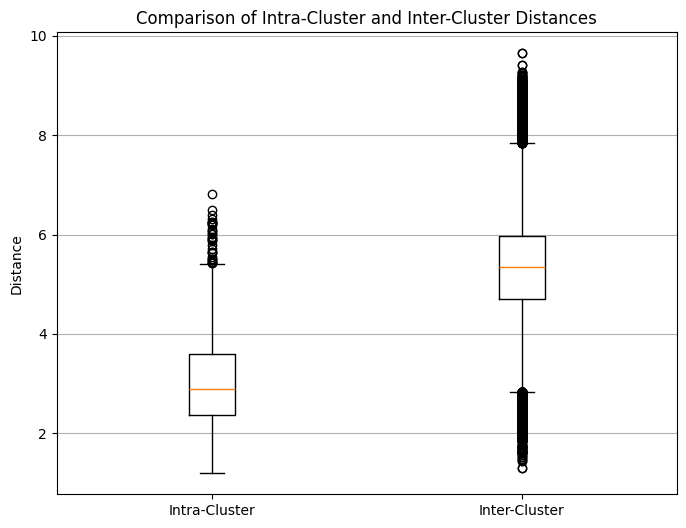

In [49]:
import matplotlib.pyplot as plt

# Visualize intra-cluster and inter-cluster distances using a box plot
def visualize_distances_boxplot(participants: List[Participant], clusters: List[set], weights: Dict[str, float]):
    # Compute the distance matrix
    distance_matrix = calculate_distance_matrix(participants, weights)

    intra_cluster_distances = []
    inter_cluster_distances = []

    for cluster in clusters:
        cluster = list(cluster)
        for i in range(len(cluster)):
            for j in range(i + 1, len(cluster)):
                # Intra-cluster distances
                intra_cluster_distances.append(distance_matrix[cluster[i], cluster[j]])

        # Inter-cluster distances
        other_clusters = [c for c in clusters if c != set(cluster)]
        for index in cluster:
            for other_cluster in other_clusters:
                for other_index in other_cluster:
                    inter_cluster_distances.append(distance_matrix[index, other_index])

    # Prepare data for the box plot
    data = [intra_cluster_distances, inter_cluster_distances]
    labels = ['Intra-Cluster', 'Inter-Cluster']

    # Create the box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(data, labels=labels)
    plt.title('Comparison of Intra-Cluster and Inter-Cluster Distances')
    plt.ylabel('Distance')
    plt.grid(axis='y')
    plt.show()

# Example usage
visualize_distances_boxplot(participants, clusters, attribute_weights)


### Violin Plot

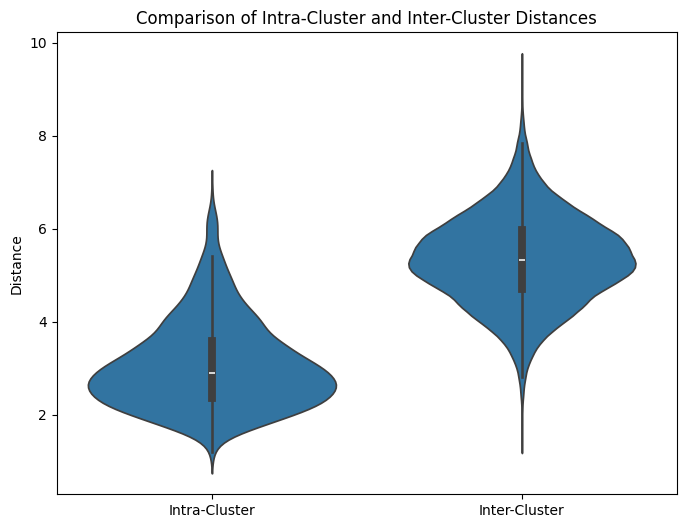

In [50]:
import seaborn as sns

# Visualize intra-cluster and inter-cluster distances using a violin plot
def visualize_distances_violinplot(participants: List[Participant], clusters: List[set], weights: Dict[str, float]):
    # Compute the distance matrix
    distance_matrix = calculate_distance_matrix(participants, weights)

    intra_cluster_distances = []
    inter_cluster_distances = []

    for cluster in clusters:
        cluster = list(cluster)
        for i in range(len(cluster)):
            for j in range(i + 1, len(cluster)):
                # Intra-cluster distances
                intra_cluster_distances.append(distance_matrix[cluster[i], cluster[j]])

        # Inter-cluster distances
        other_clusters = [c for c in clusters if c != set(cluster)]
        for index in cluster:
            for other_cluster in other_clusters:
                for other_index in other_cluster:
                    inter_cluster_distances.append(distance_matrix[index, other_index])

    # Prepare data for the violin plot
    distances = intra_cluster_distances + inter_cluster_distances
    labels = ['Intra-Cluster'] * len(intra_cluster_distances) + ['Inter-Cluster'] * len(inter_cluster_distances)

    # Create the violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=labels, y=distances)
    plt.title('Comparison of Intra-Cluster and Inter-Cluster Distances')
    plt.ylabel('Distance')
    plt.show()

# Example usage
visualize_distances_violinplot(participants, clusters, attribute_weights)
